<a href="https://colab.research.google.com/github/lesyayu/robot_deams-_sheets/blob/main/Lesson5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Visualization using *Seaborm*

Gallery with code is [here](https://seaborn.pydata.org/examples/index.html)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme()

In [ ]:
sns.load_dataset("penguins")

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
penguins = pd.read_csv("penguins.csv")

More examples with this dataset is [here](https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn)

In [ ]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

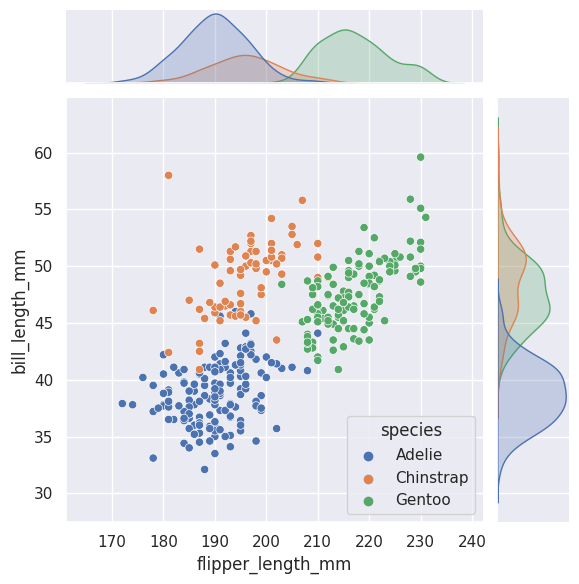

In [ ]:
# pairplot is scatterplot from Matplotlib analogue
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

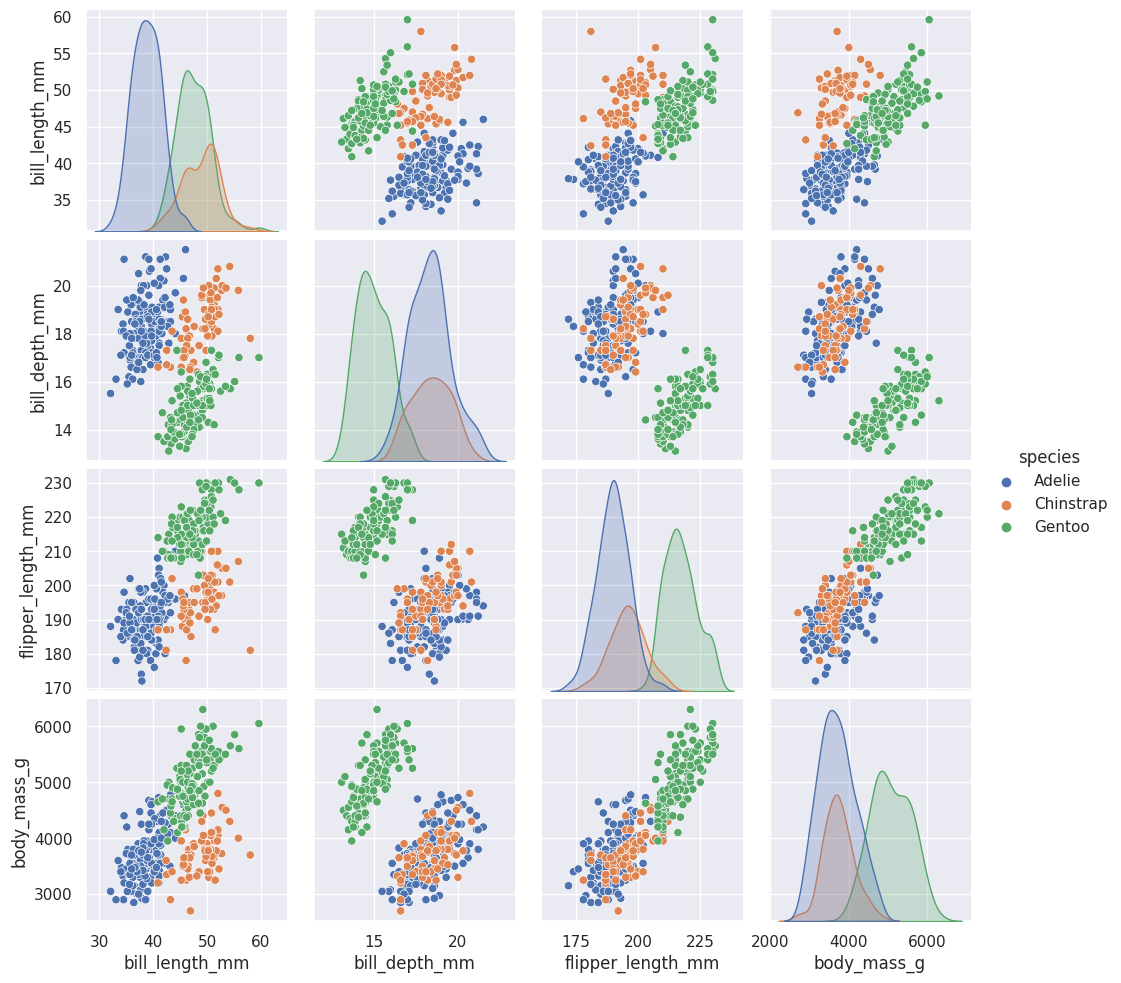

In [ ]:

sns.pairplot(data=penguins, hue="species");

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

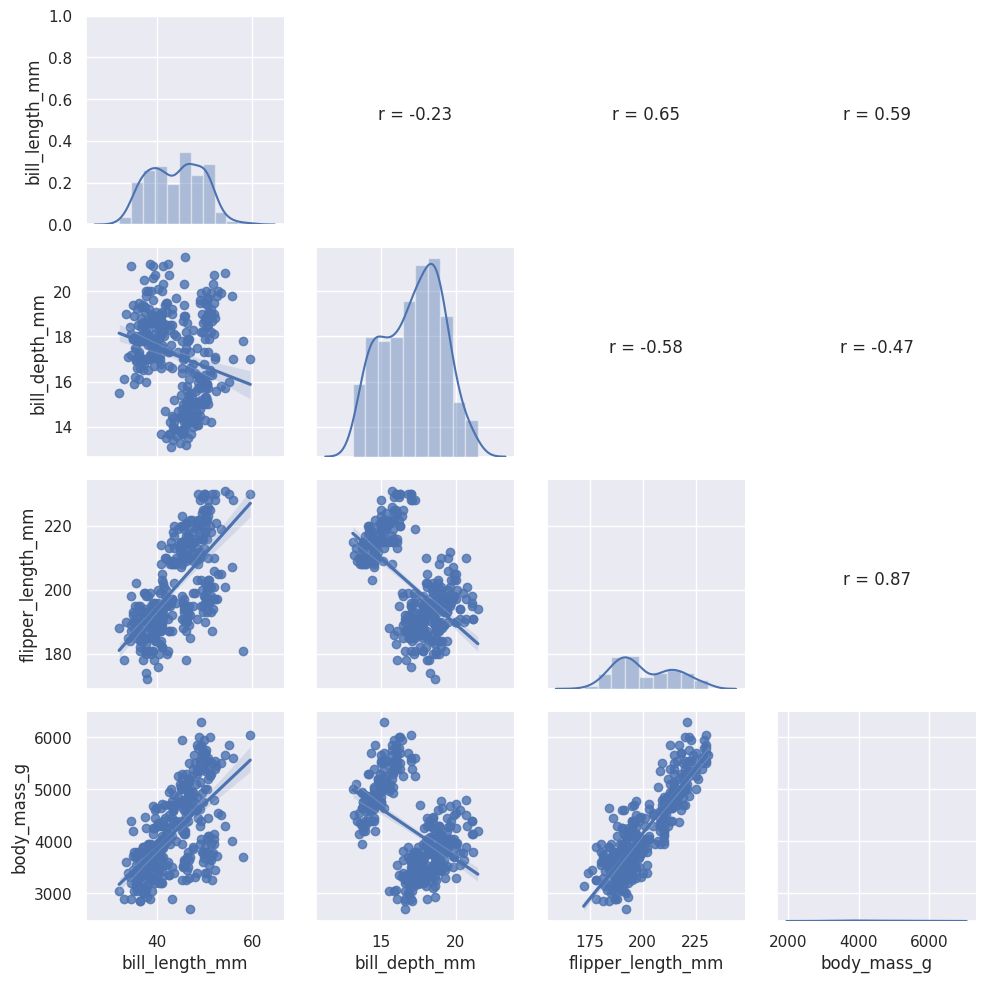

In [ ]:
g = sns.PairGrid(penguins.dropna())

g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef);

We can change theme and add some settings

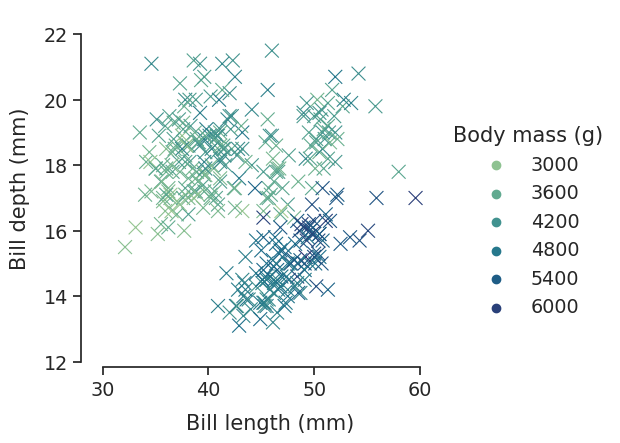

In [ ]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True);

## EDA

**EDA stages**

- Feature identification and their data types
- Structure Investigation
  - Structure of non-numerical features
  - Structure of numerical features
  - Statistical characteristics of the features
- Quality Investigation
  - Duplicates
  - Missing values
  - Unwanted entries and recording errors
- Content Investigation
  - Feature distribution
  - Feature patterns
  - Feature relationships

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Continue work with [Health Insurance Cross Sell Prediction](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?resource=download&select=test.csv) dataset
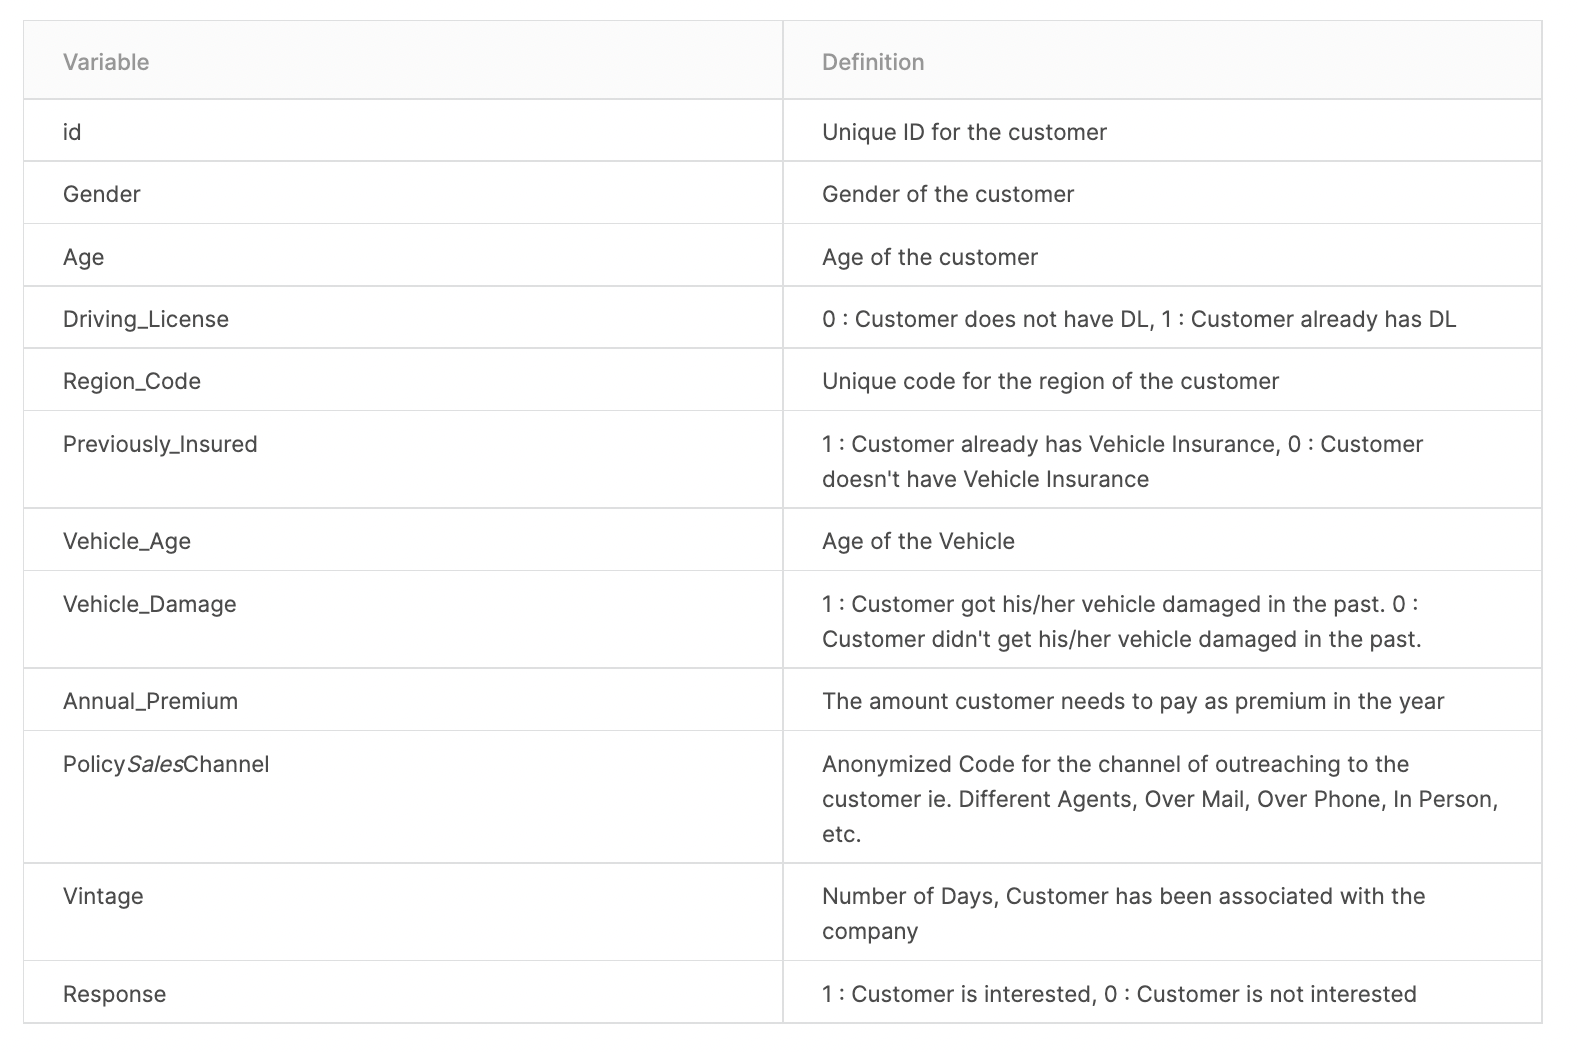

We already know lots of functions for EDA. Lets go through the process

In [ ]:
df = pd.read_csv('train.csv')

### Quick data overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
df.shape

(381109, 12)

### Statistical data summay

In [ ]:
df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

### Data types

In [ ]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

From the common sense we see that not all columns have appropriate data type

In [ ]:
df.Vehicle_Damage.value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
# this does not work
df.Vehicle_Damage.astype(bool)

0         True
1         True
2         True
3         True
4         True
          ... 
381104    True
381105    True
381106    True
381107    True
381108    True
Name: Vehicle_Damage, Length: 381109, dtype: bool

In [ ]:
df.Vehicle_Damage

0         Yes
1          No
2         Yes
3          No
4          No
         ... 
381104     No
381105     No
381106     No
381107    Yes
381108     No
Name: Vehicle_Damage, Length: 381109, dtype: object

In [ ]:
int(df.Vehicle_Damage.loc[0]=='Yes')

1

In [ ]:
df.Vehicle_Damage = df.Vehicle_Damage.apply(lambda x: int(x=='Yes'))

In [ ]:
df.Vehicle_Damage.astype(bool)

0          True
1         False
2          True
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107     True
381108    False
Name: Vehicle_Damage, Length: 381109, dtype: bool

In [ ]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years               1         40454.0                  26.0      217   
1    1-2 Year               0         33536.0                  26.0      183   
2   > 2 Years               1         38294.0                  26.0       27   
3    < 1 Year               0         28619.0                 152.0      203   
4    < 1 Year               0         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
df.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
df.Vehicle_Age = pd.Categorical(df.Vehicle_Age,
                                categories=['< 1 Year', '1-2 Year', '> 2 Years'],
                                ordered=True)

In [ ]:
df.Vehicle_Age

0         > 2 Years
1          1-2 Year
2         > 2 Years
3          < 1 Year
4          < 1 Year
            ...    
381104     1-2 Year
381105     < 1 Year
381106     < 1 Year
381107    > 2 Years
381108     1-2 Year
Name: Vehicle_Age, Length: 381109, dtype: category
Categories (3, object): ['< 1 Year' < '1-2 Year' < '> 2 Years']

In [ ]:
to_category = ['id', 'Region_Code', 'Policy_Sales_Channel']
bool_cols = ['Previously_Insured', 'Driving_License', 'Response', 'Vehicle_Damage']

In [ ]:
for c in to_category:
    df[c] = df[c].astype(str)

In [ ]:
df.Region_Code


0         28.0
1          3.0
2         28.0
3         11.0
4         41.0
          ... 
381104    26.0
381105    37.0
381106    30.0
381107    14.0
381108    29.0
Name: Region_Code, Length: 381109, dtype: object

In [ ]:
df.dtypes

id                        object
Gender                    object
Age                        int64
Driving_License            int64
Region_Code               object
Previously_Insured         int64
Vehicle_Age             category
Vehicle_Damage             int64
Annual_Premium           float64
Policy_Sales_Channel      object
Vintage                    int64
Response                   int64
dtype: object

In [ ]:
cat_cols = df.select_dtypes(['object', 'bool', 'category']).columns
num_cols = df.select_dtypes(['int', 'float']).columns

cat_cols, num_cols

(Index(['id', 'Gender', 'Region_Code', 'Vehicle_Age', 'Policy_Sales_Channel'], dtype='object'),
 Index(['Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage',
        'Annual_Premium', 'Vintage', 'Response'],
       dtype='object'))

In [ ]:
np.setdiff1d(num_cols, bool_cols)

array(['Age', 'Annual_Premium', 'Vintage'], dtype=object)

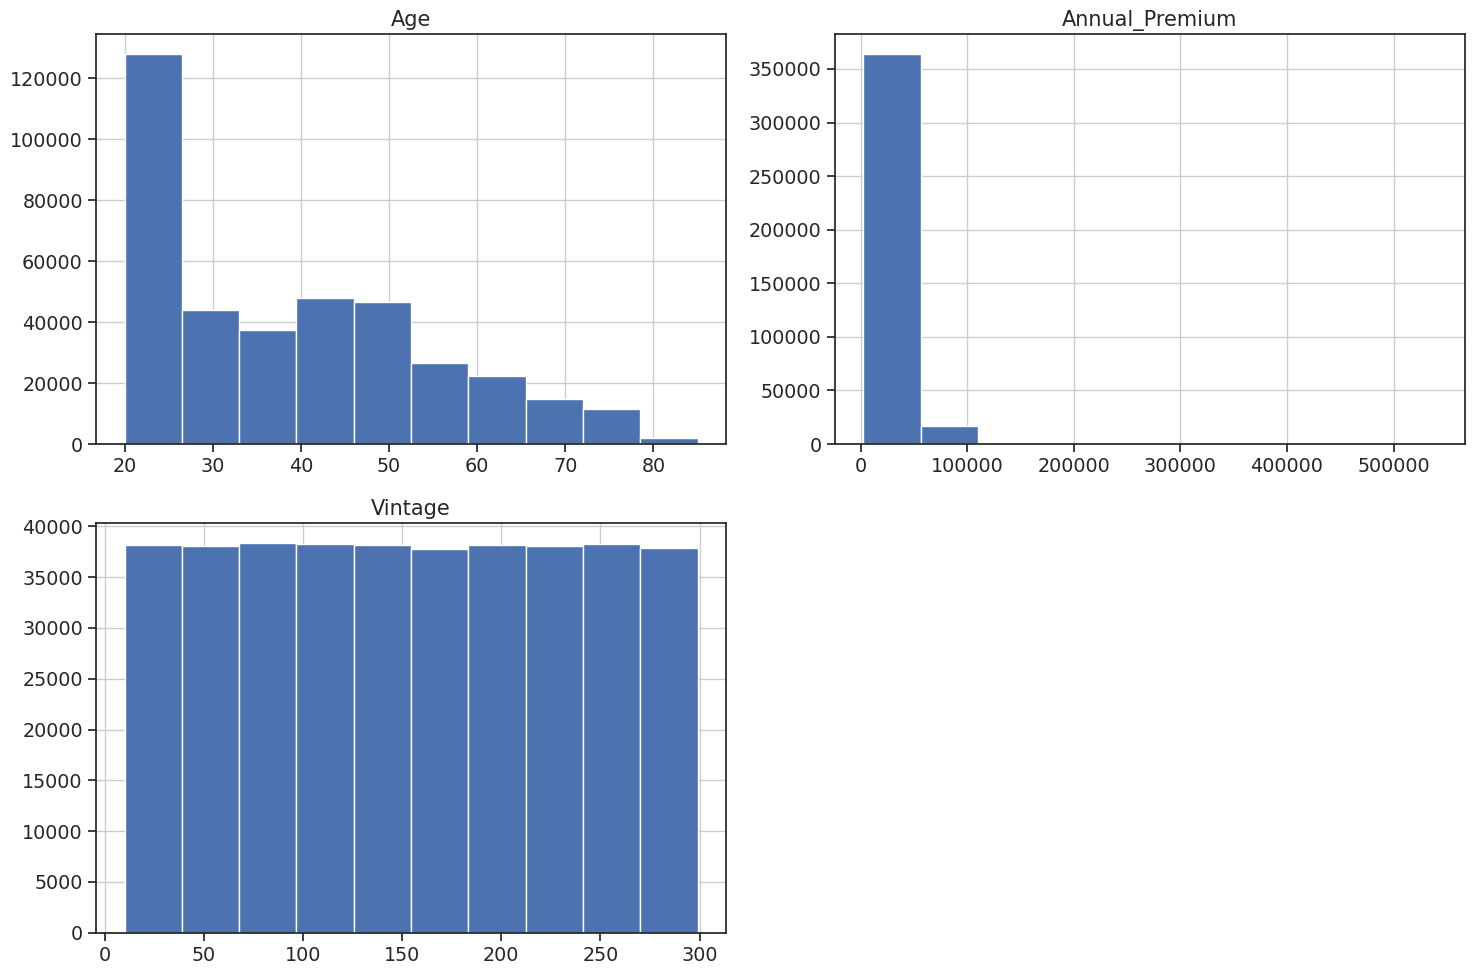

In [ ]:
df[np.setdiff1d(num_cols, bool_cols)].hist(figsize=(15,10))
plt.tight_layout()

Бачимо, що змінна Vintage в даному масштабі рівномірно розподілена за різними значеннями. Варто також дослідити значення її стандартного відхилення, можливо вона насправді розподілена не так вже й рівномірно, але зазвичай подібні змінні схильні мало впливати на точність моделей.

У змінної Age значення 20 – підозріло високе. Можна припустити, що це значення за замовчуванням, але щоб визначити, де інформація проставлена правильно, а де вибрано параметр за замовчуванням - потрібен додатковий аналіз.

In [ ]:
df[np.setdiff1d(num_cols, bool_cols)].describe()

Age  Annual_Premium        Vintage
count  381109.000000   381109.000000  381109.000000
mean       38.822584    30564.389581     154.347397
std        15.511611    17213.155057      83.671304
min        20.000000     2630.000000      10.000000
25%        25.000000    24405.000000      82.000000
50%        36.000000    31669.000000     154.000000
75%        49.000000    39400.000000     227.000000
max        85.000000   540165.000000     299.000000

### Categorical features encoding

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.

Категоріальні змінні зазвичай кодують, що може бути корисно для аналізу даних, а часом необхідно для побудови моделей машинного навчання.  Більше про кодування категоріальних змінних можете почитати [тут](https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/#:~:text=Encoding%20categorical%20data%20is%20a,provided%20to%20the%20different%20models.&text=In%20the%20field%20of%20data,preparation%20is%20a%20mandatory%20task.)

**pd.get_dummies** - для кодування незалежних змінних

Автоматично створює назви колонок для кожної категорії змінної, оригінальна колонка видаляється

In [ ]:
df_gender_d = pd.get_dummies(df, columns=['Gender'])
df_gender_d

id  Age  Driving_License Region_Code  Previously_Insured  \
0            1   44                1        28.0                   0   
1            2   76                1         3.0                   0   
2            3   47                1        28.0                   0   
3            4   21                1        11.0                   1   
4            5   29                1        41.0                   1   
...        ...  ...              ...         ...                 ...   
381104  381105   74                1        26.0                   1   
381105  381106   30                1        37.0                   1   
381106  381107   21                1        30.0                   1   
381107  381108   68                1        14.0                   0   
381108  381109   46                1        29.0                   0   

       Vehicle_Age  Vehicle_Damage  Annual_Premium Policy_Sales_Channel  \
0        > 2 Years               1         40454.0                 26.0   
1         1-2 Year               0         33536.0                 26.0   
2        > 2 Years               1         38294.0                 26.0   
3         < 1 Year               0         28619.0                152.0   
4         < 1 Year               0         27496.0                152.0   
...            ...             ...             ...                  ...   
381104    1-2 Year               0         30170.0                 26.0   
381105    < 1 Year               0         40016.0                152.0   
381106    < 1 Year               0         35118.0                160.0   
381107   > 2 Years               1         44617.0                124.0   
381108    1-2 Year               0         41777.0                 26.0   

        Vintage  Response  Gender_Female  Gender_Male  
0           217         1              0            1  
1           183         0              0            1  
2            27         1              0            1  
3           203         0              0            1  
4            39         0              1            0  
...         ...       ...            ...          ...  
381104       88         0              0            1  
381105      131         0              0            1  
381106      161         0              0            1  
381107       74         0              1            0  
381108      237         0              0            1  

[381109 rows x 13 columns]

**Увага**: не використовуйте цю функцію для побудови ML моделей. В тестовому датасеті може виявитись нове значення категорії і в цьому випадку, виникне помилка.

При побудові ML моделей доцільніше використовувати **sklearn.preprocessing.OneHotEncoder** або писати власні методи.

In [ ]:
cat_cols


Index(['id', 'Gender', 'Region_Code', 'Vehicle_Age', 'Policy_Sales_Channel'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(df[cat_cols[1:]])    # Assume for simplicity all features are categorical.
encoded_data = encoder.transform(df[cat_cols[1:]])
encoder.get_feature_names_out()

# Apply the encoder.
# X_train = encoder.transform(X_train[cat_cols])
# X_test = encoder.transform(X_test[cat_cols])

array(['Gender_Female', 'Gender_Male', 'Region_Code_0.0',
       'Region_Code_1.0', 'Region_Code_10.0', 'Region_Code_11.0',
       'Region_Code_12.0', 'Region_Code_13.0', 'Region_Code_14.0',
       'Region_Code_15.0', 'Region_Code_16.0', 'Region_Code_17.0',
       'Region_Code_18.0', 'Region_Code_19.0', 'Region_Code_2.0',
       'Region_Code_20.0', 'Region_Code_21.0', 'Region_Code_22.0',
       'Region_Code_23.0', 'Region_Code_24.0', 'Region_Code_25.0',
       'Region_Code_26.0', 'Region_Code_27.0', 'Region_Code_28.0',
       'Region_Code_29.0', 'Region_Code_3.0', 'Region_Code_30.0',
       'Region_Code_31.0', 'Region_Code_32.0', 'Region_Code_33.0',
       'Region_Code_34.0', 'Region_Code_35.0', 'Region_Code_36.0',
       'Region_Code_37.0', 'Region_Code_38.0', 'Region_Code_39.0',
       'Region_Code_4.0', 'Region_Code_40.0', 'Region_Code_41.0',
       'Region_Code_42.0', 'Region_Code_43.0', 'Region_Code_44.0',
       'Region_Code_45.0', 'Region_Code_46.0', 'Region_Code_47.0',
       '

In [ ]:
encoded_data


<381109x213 sparse matrix of type '<class 'numpy.float64'>'
	with 1524436 stored elements in Compressed Sparse Row format>

In [ ]:
encoded_arr = encoded_data.toarray()

In [ ]:
encoded_arr.shape

(381109, 213)

In [ ]:
encoded_df = pd.DataFrame(encoded_arr, columns = encoder.get_feature_names_out())
encoded_df

Gender_Female  Gender_Male  Region_Code_0.0  Region_Code_1.0  \
0                 0.0          1.0              0.0              0.0   
1                 0.0          1.0              0.0              0.0   
2                 0.0          1.0              0.0              0.0   
3                 0.0          1.0              0.0              0.0   
4                 1.0          0.0              0.0              0.0   
...               ...          ...              ...              ...   
381104            0.0          1.0              0.0              0.0   
381105            0.0          1.0              0.0              0.0   
381106            0.0          1.0              0.0              0.0   
381107            1.0          0.0              0.0              0.0   
381108            0.0          1.0              0.0              0.0   

        Region_Code_10.0  Region_Code_11.0  Region_Code_12.0  \
0                    0.0               0.0               0.0   
1                    0.0               0.0               0.0   
2                    0.0               0.0               0.0   
3                    0.0               1.0               0.0   
4                    0.0               0.0               0.0   
...                  ...               ...               ...   
381104               0.0               0.0               0.0   
381105               0.0               0.0               0.0   
381106               0.0               0.0               0.0   
381107               0.0               0.0               0.0   
381108               0.0               0.0               0.0   

        Region_Code_13.0  Region_Code_14.0  Region_Code_15.0  ...  \
0                    0.0               0.0               0.0  ...   
1                    0.0               0.0               0.0  ...   
2                    0.0               0.0               0.0  ...   
3                    0.0               0.0               0.0  ...   
4                    0.0               0.0               0.0  ...   
...                  ...               ...               ...  ...   
381104               0.0               0.0               0.0  ...   
381105               0.0               0.0               0.0  ...   
381106               0.0               0.0               0.0  ...   
381107               0.0               1.0               0.0  ...   
381108               0.0               0.0               0.0  ...   

        Policy_Sales_Channel_90.0  Policy_Sales_Channel_91.0  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   
...                           ...                        ...   
381104                        0.0                        0.0   
381105                        0.0                        0.0   
381106                        0.0                        0.0   
381107                        0.0                        0.0   
381108                        0.0                        0.0   

        Policy_Sales_Channel_92.0  Policy_Sales_Channel_93.0  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   
...                           ...                        ...   
381104                        0.0                        0.0   
381105                        0.0                        0.0   
381106                        0.0                        0.0   
381107                        0.0                        0.0   
381108                        0.0                        0.0   

       

In [ ]:
df

id  Gender  Age  Driving_License Region_Code  Previously_Insured  \
0            1    Male   44                1        28.0                   0   
1            2    Male   76                1         3.0                   0   
2            3    Male   47                1        28.0                   0   
3            4    Male   21                1        11.0                   1   
4            5  Female   29                1        41.0                   1   
...        ...     ...  ...              ...         ...                 ...   
381104  381105    Male   74                1        26.0                   1   
381105  381106    Male   30                1        37.0                   1   
381106  381107    Male   21                1        30.0                   1   
381107  381108  Female   68                1        14.0                   0   
381108  381109    Male   46                1        29.0                   0   

       Vehicle_Age  Vehicle_Damage  Annual_Premium Policy_Sales_Channel  \
0        > 2 Years               1         40454.0                 26.0   
1         1-2 Year               0         33536.0                 26.0   
2        > 2 Years               1         38294.0                 26.0   
3         < 1 Year               0         28619.0                152.0   
4         < 1 Year               0         27496.0                152.0   
...            ...             ...             ...                  ...   
381104    1-2 Year               0         30170.0                 26.0   
381105    < 1 Year               0         40016.0                152.0   
381106    < 1 Year               0         35118.0                160.0   
381107   > 2 Years               1         44617.0                124.0   
381108    1-2 Year               0         41777.0                 26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

### Feartures relationship

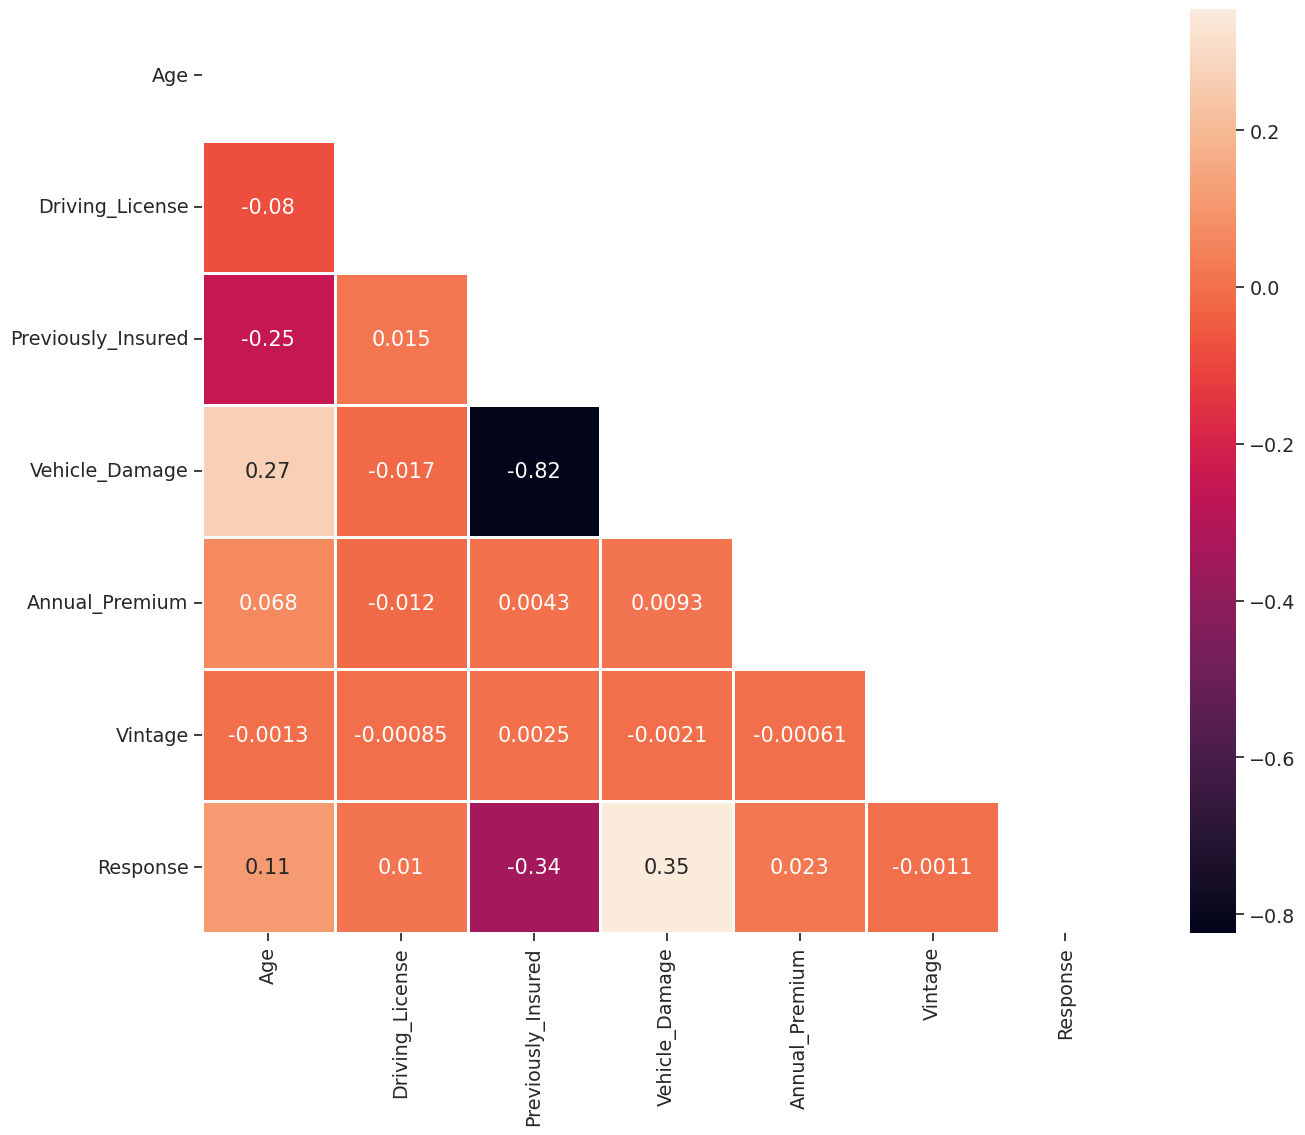

In [ ]:
corr_data = df.drop(['id'],axis = 1)

plt.figure(figsize=(15, 12))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

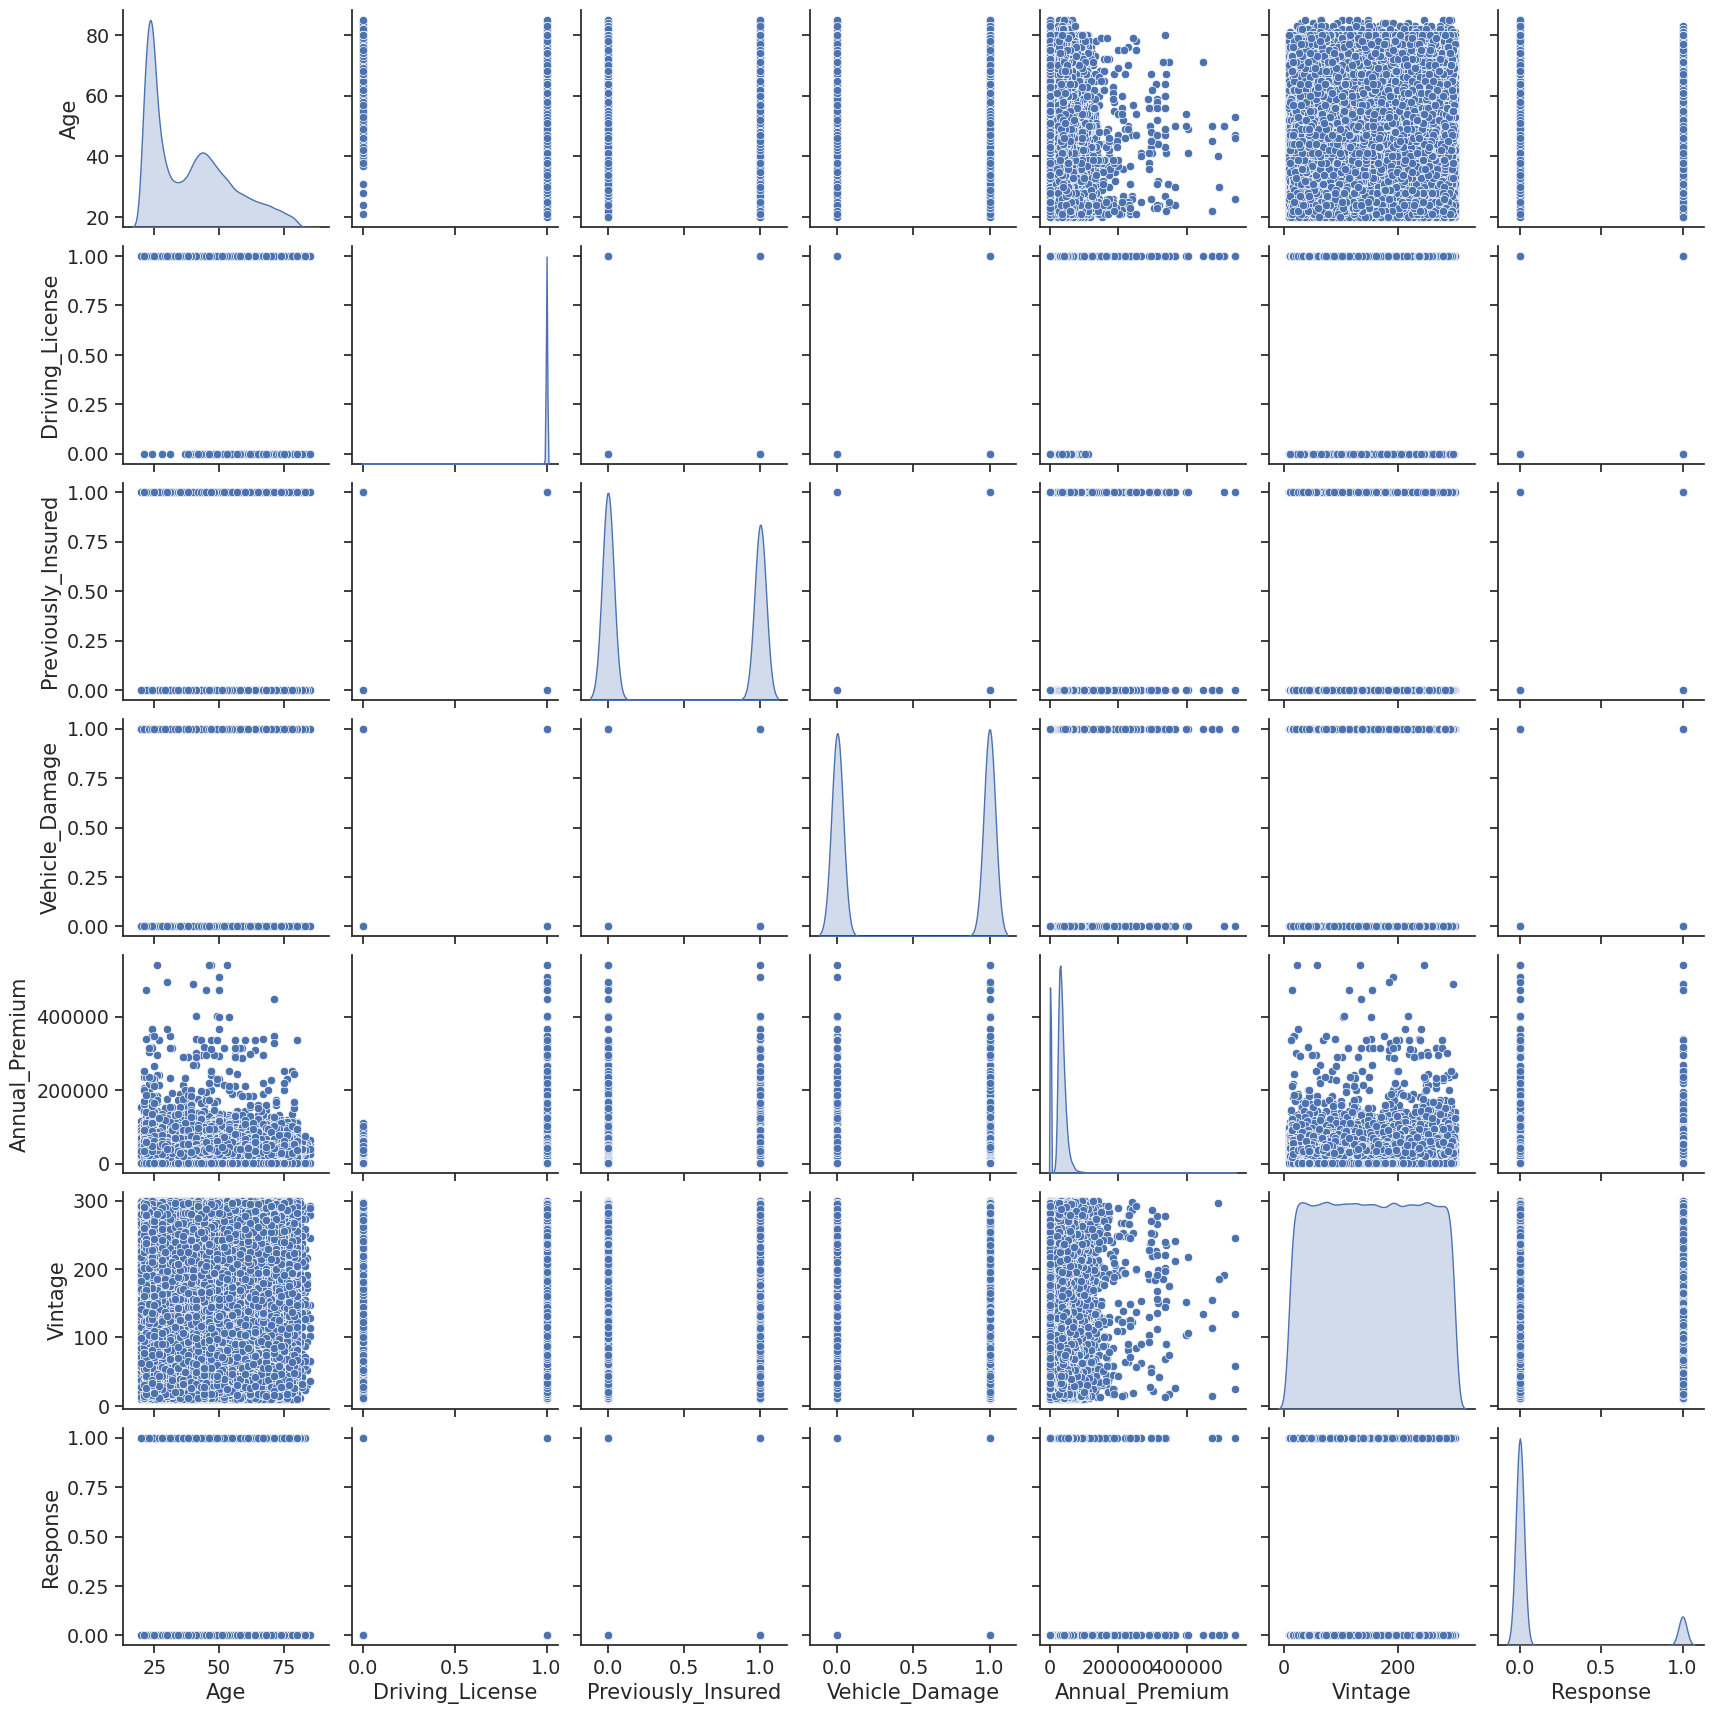

In [ ]:
sns.pairplot(df, diag_kind='kde')

### Data quality

### Duplicates identification

In [ ]:
help(pd.DataFrame.duplicated)

Help on function duplicated in module pandas.core.frame:

duplicated(self, subset: 'Hashable | Sequence[Hashable] | None' = None, keep: "Literal['first', 'last', False]" = 'first') -> 'Series'
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series
        Boolean series for each duplicated rows.
    
    See Also
    --------
    Index.duplicated : Equivalent method on index.
    Se

In [ ]:
duplicate = df[df.duplicated(keep = 'last')]

In [ ]:
duplicate

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []

There is no duplicates in our dataset

In [ ]:
employees = [('Joanna', 28, 'Krakow'),
            ('Pavlo', 32, 'Kyiv'),
            ('Dmytro', 25, 'Dnipro'),
            ('Nadia', 32, 'Kyiv'),
            ('Pavlo', 32, 'Kyiv'),
            ('Olha', 32, 'Dnipro'),
            ('Aleksandr', 40, 'Warsaw'),
            ('Pavlo', 32, 'Kyiv')
            ]

# Creating a DataFrame object
df = pd.DataFrame(employees,
                  columns = ['Name', 'Age', 'City'])

In [ ]:
df

Name  Age    City
0     Joanna   28  Krakow
1      Pavlo   32    Kyiv
2     Dmytro   25  Dnipro
3      Nadia   32    Kyiv
4      Pavlo   32    Kyiv
5       Olha   32  Dnipro
6  Aleksandr   40  Warsaw
7      Pavlo   32    Kyiv

In [ ]:
duplicate = df[df.duplicated()]
duplicate

Name  Age  City
4  Pavlo   32  Kyiv
7  Pavlo   32  Kyiv

In [ ]:
df.duplicated()

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7     True
dtype: bool

In [ ]:
df.duplicated(keep=False)

0    False
1     True
2    False
3    False
4     True
5    False
6    False
7     True
dtype: bool

In [ ]:
df[~df.duplicated(keep=False)]

Name  Age    City
0     Joanna   28  Krakow
2     Dmytro   25  Dnipro
3      Nadia   32    Kyiv
5       Olha   32  Dnipro
6  Aleksandr   40  Warsaw

Припустимо, ми хочемо знайти дублікати по містах

In [ ]:
df[df.duplicated('City')]

Name  Age    City
3  Nadia   32    Kyiv
4  Pavlo   32    Kyiv
5   Olha   32  Dnipro
7  Pavlo   32    Kyiv

In [ ]:
df

Name  Age    City
0     Joanna   28  Krakow
1      Pavlo   32    Kyiv
2     Dmytro   25  Dnipro
3      Nadia   32    Kyiv
4      Pavlo   32    Kyiv
5       Olha   32  Dnipro
6  Aleksandr   40  Warsaw
7      Pavlo   32    Kyiv

... або по імені і віку

In [ ]:
df[df.duplicated(['Name', 'Age'])]

Name  Age  City
4  Pavlo   32  Kyiv
7  Pavlo   32  Kyiv

### Видалення дублікатів

In [ ]:
help(pd.DataFrame.drop_duplicates)

Help on function drop_duplicates in module pandas.core.frame:

drop_duplicates(self, subset: 'Hashable | Sequence[Hashable] | None' = None, *, keep: "Literal['first', 'last', False]" = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None'
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to keep.
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : bool, default False
        Whether to modify the DataFrame rather than creati

In [ ]:
df = df.drop_duplicates()

In [ ]:
df

Name  Age    City
0     Joanna   28  Krakow
1      Pavlo   32    Kyiv
2     Dmytro   25  Dnipro
3      Nadia   32    Kyiv
5       Olha   32  Dnipro
6  Aleksandr   40  Warsaw

In [ ]:
df.drop_duplicates(subset=['City'])

Name  Age    City
0     Joanna   28  Krakow
1      Pavlo   32    Kyiv
2     Dmytro   25  Dnipro
6  Aleksandr   40  Warsaw

### Sweetwiz

Sweetviz генерує якісний і зручний репорт на основі даних. Може використовуватись для EDA. + є можливість роздивитись взаємодію фіч з таргетом і порівняти датасети

[Репозиторий](https://github.com/fbdesignpro/sweetviz ) проекту:  
[Стаття](https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34) з детальним описом проекту.

Ще одна ороша стаття [тут](https://towardsdatascience.com/fast-eda-in-jupyter-colab-notebooks-using-sweetviz-2-0-99c22bcb3a1c)

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 27.8 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("train.csv")
df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

                                             |          | [  0%]   00:00 -> (? left)


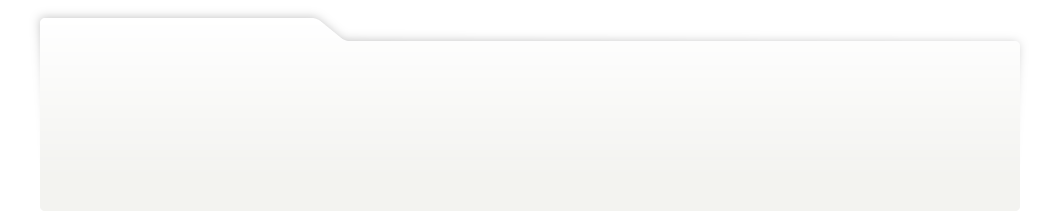
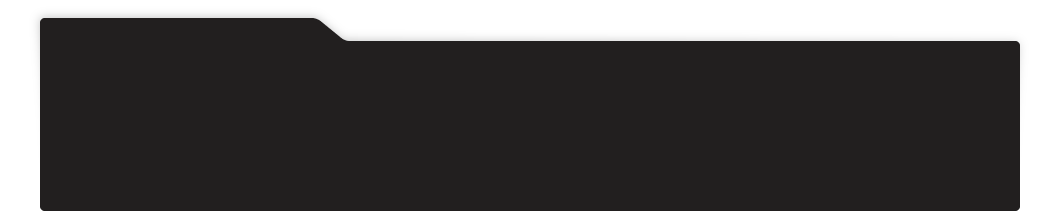
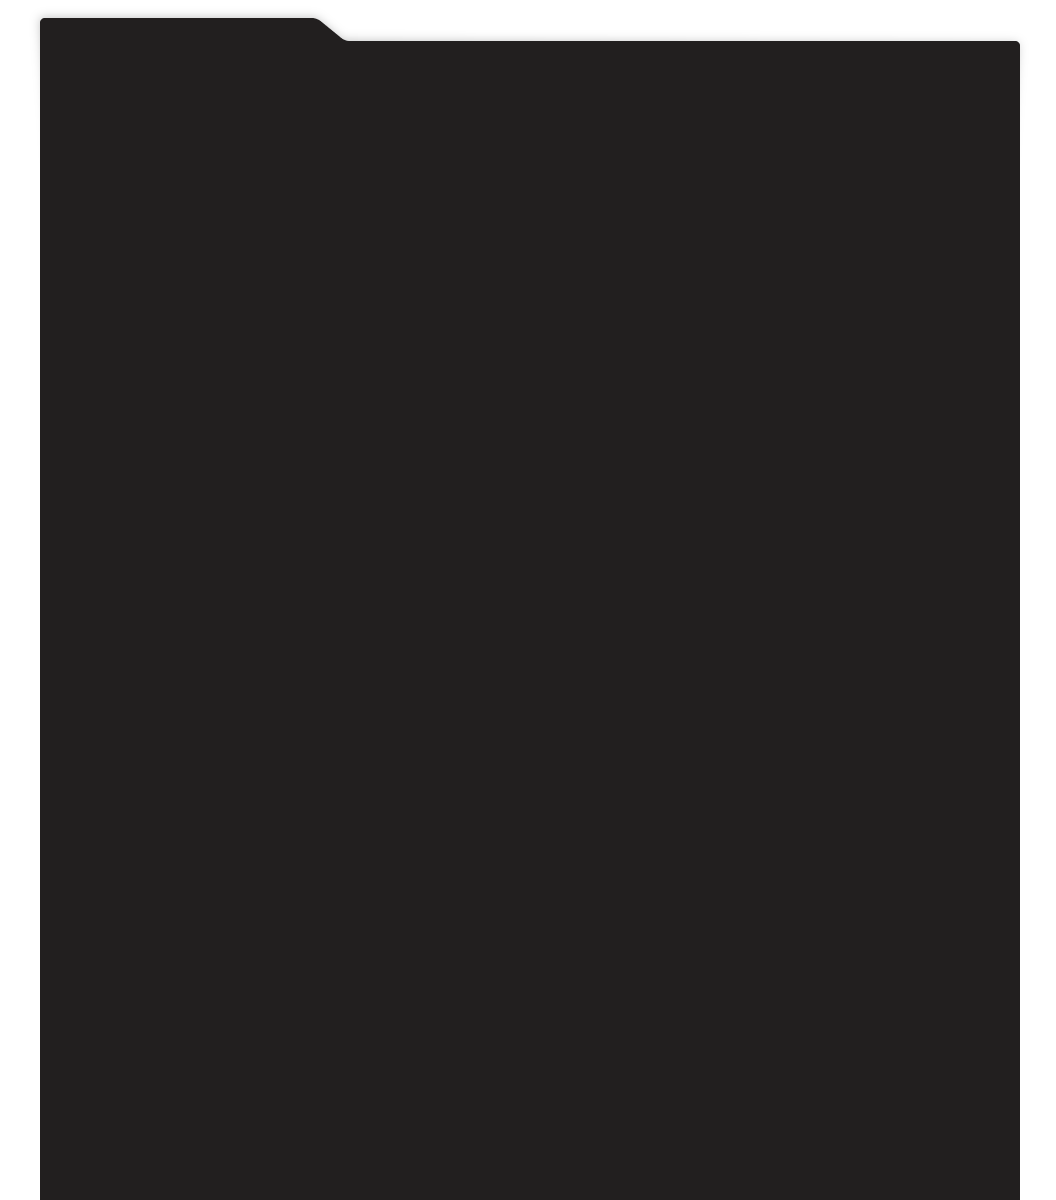
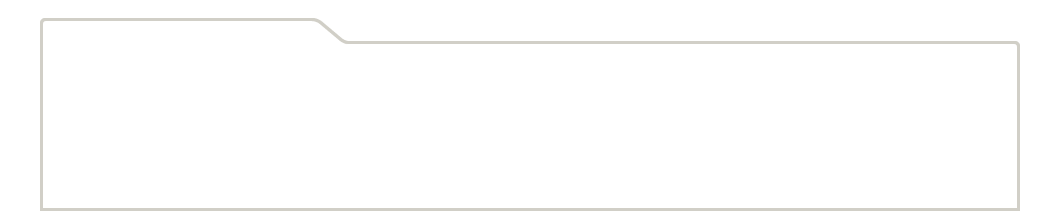
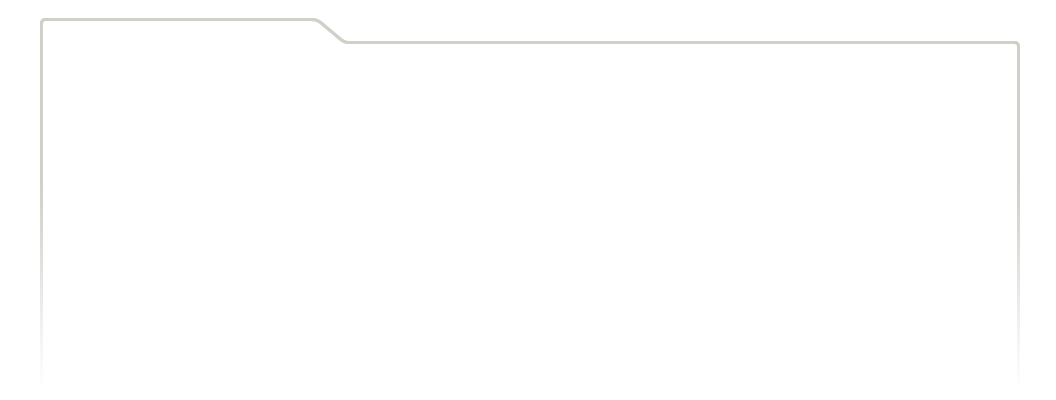
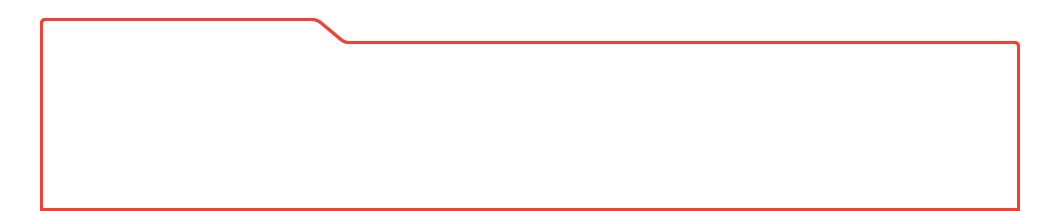
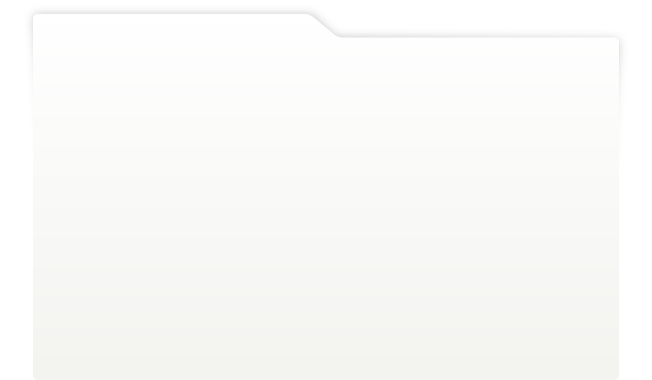
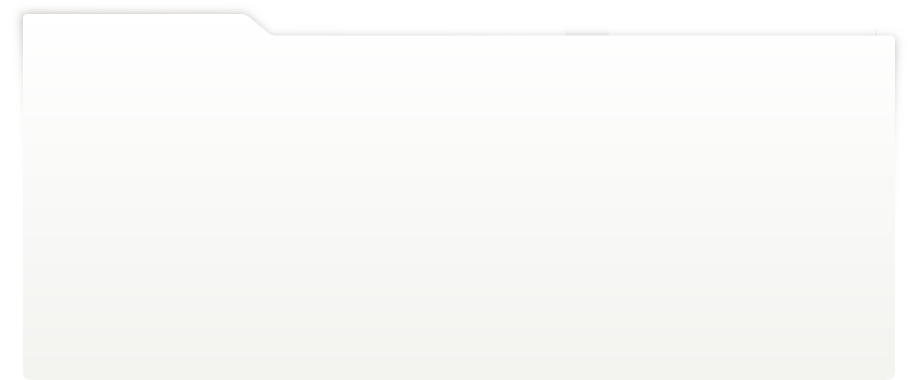
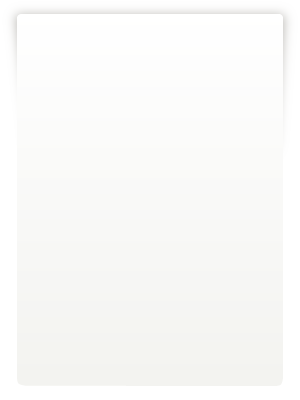
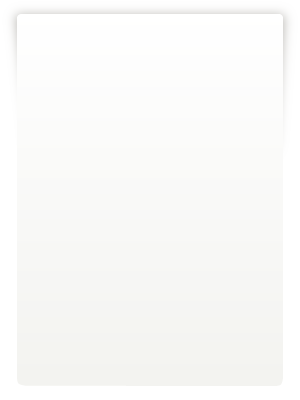
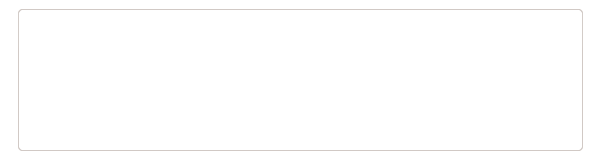
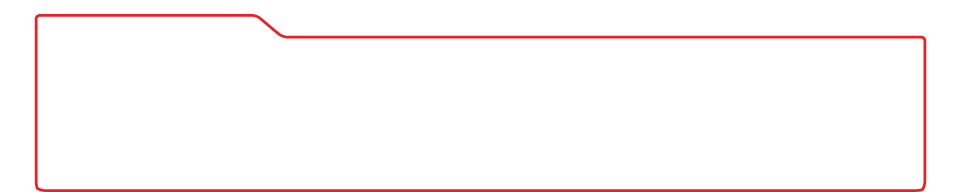
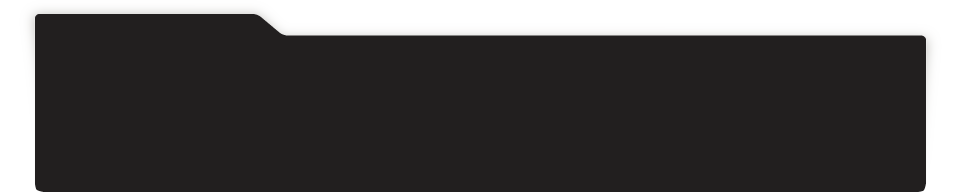
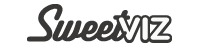
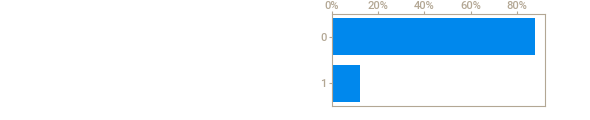
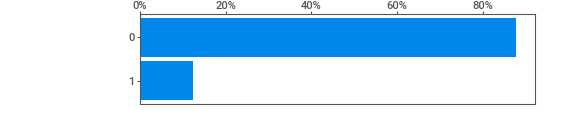
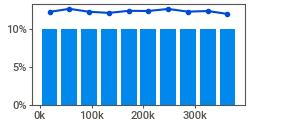
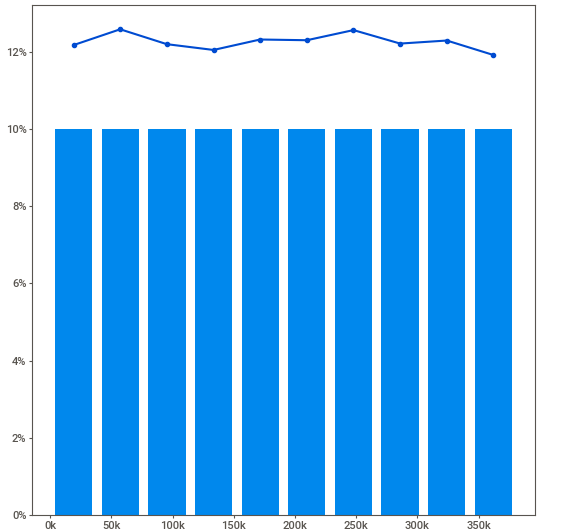
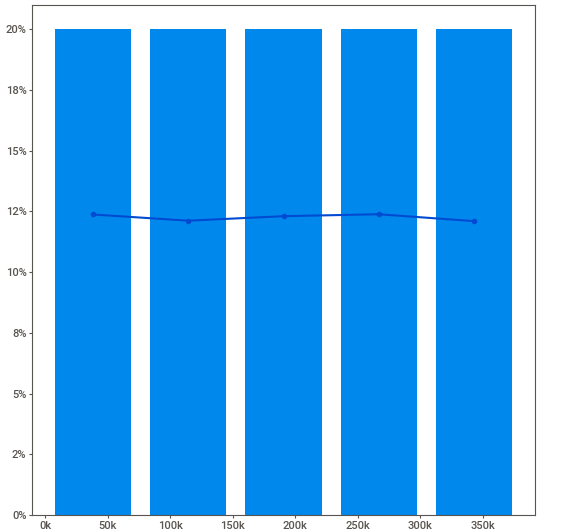
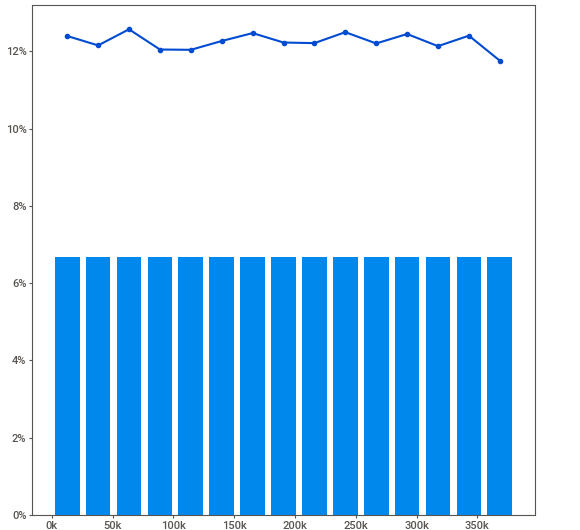
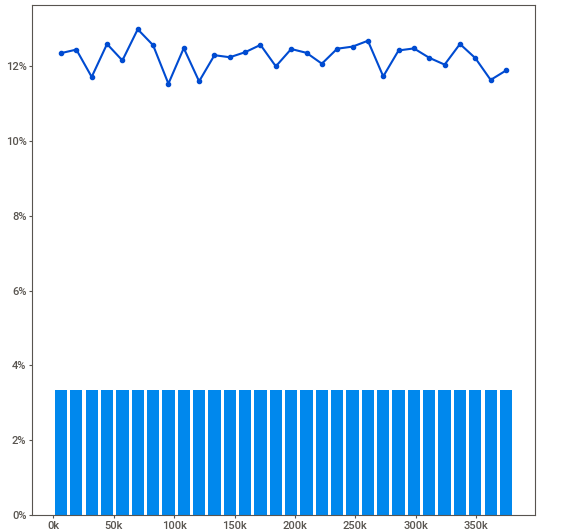
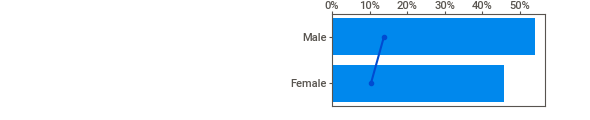
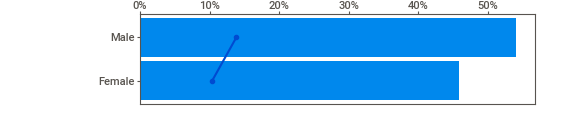
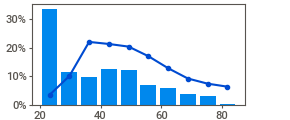
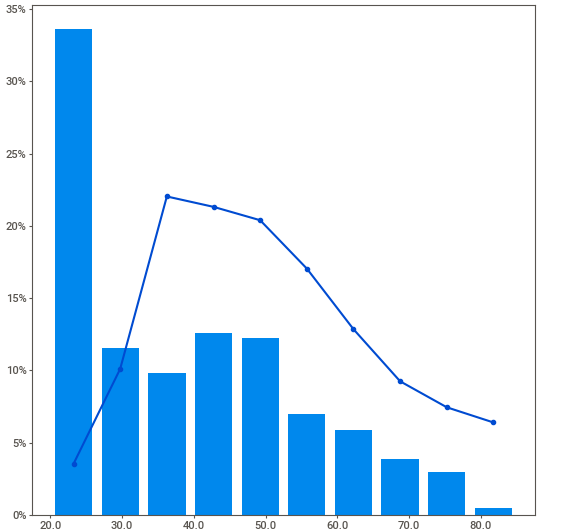
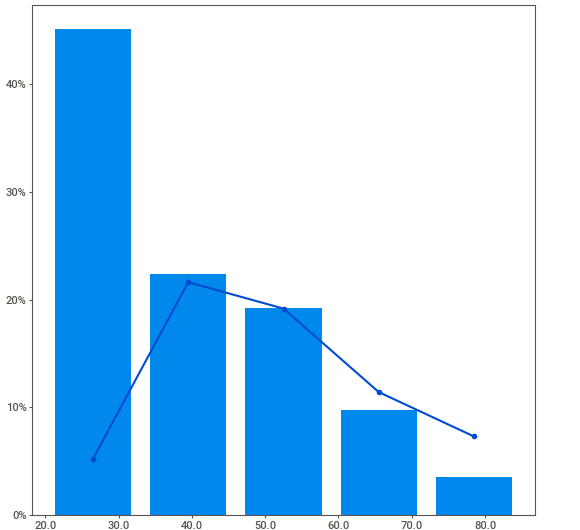
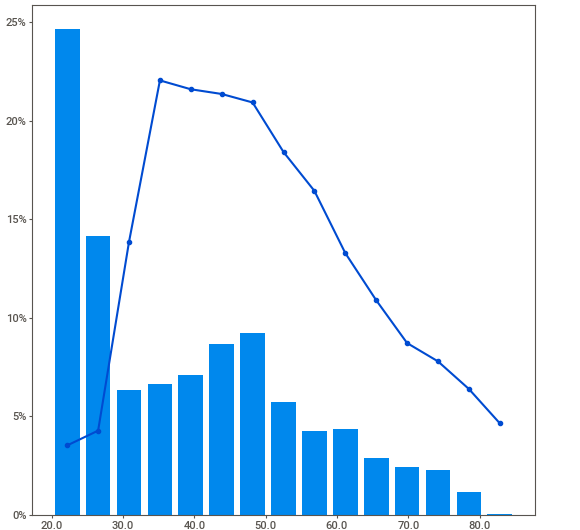
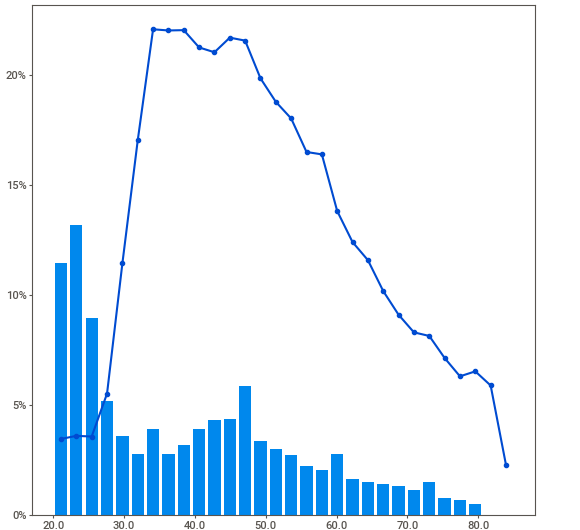
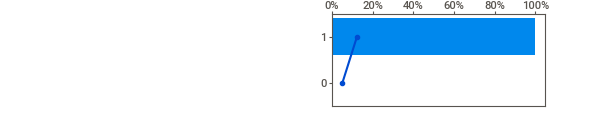
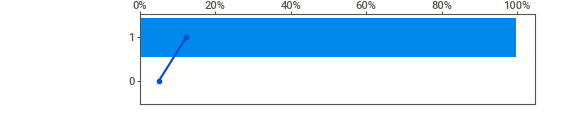
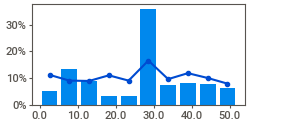
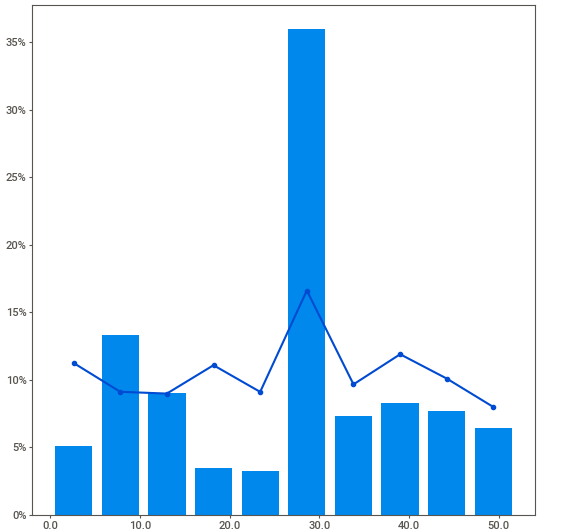
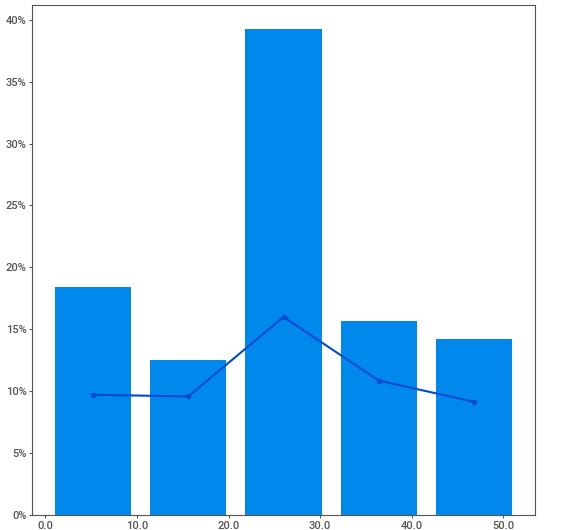
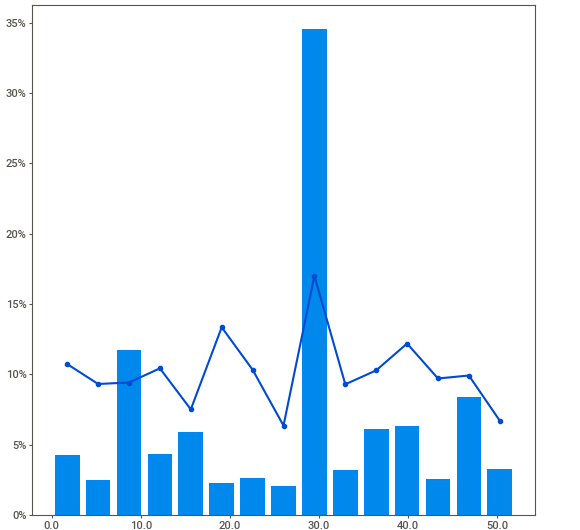
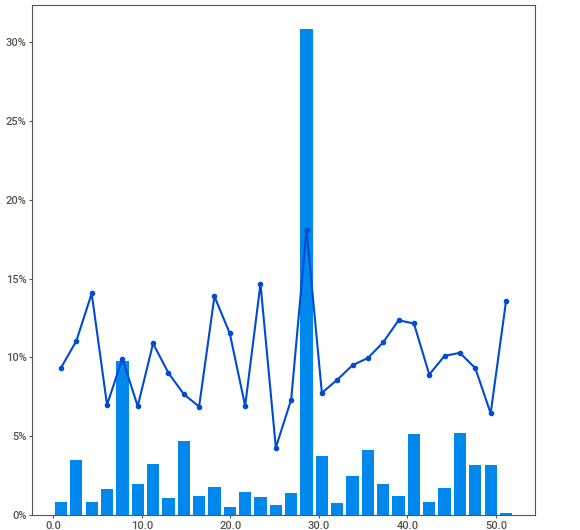
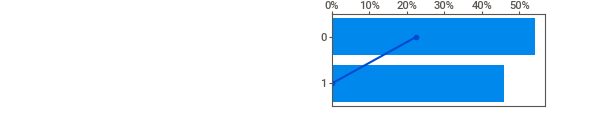
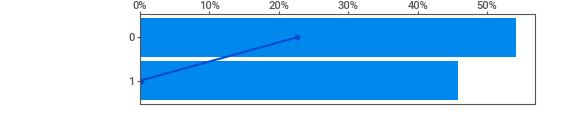
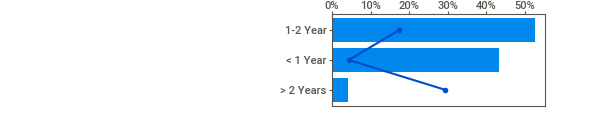
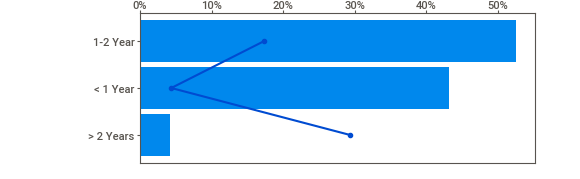
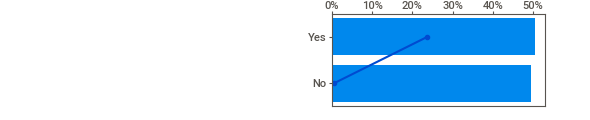
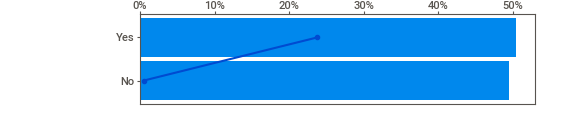
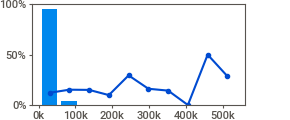
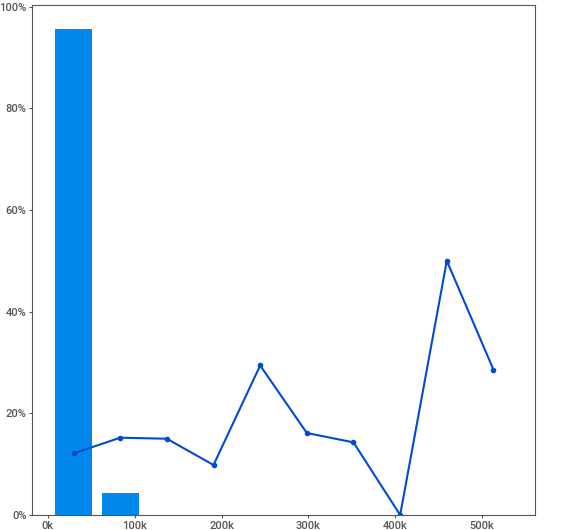
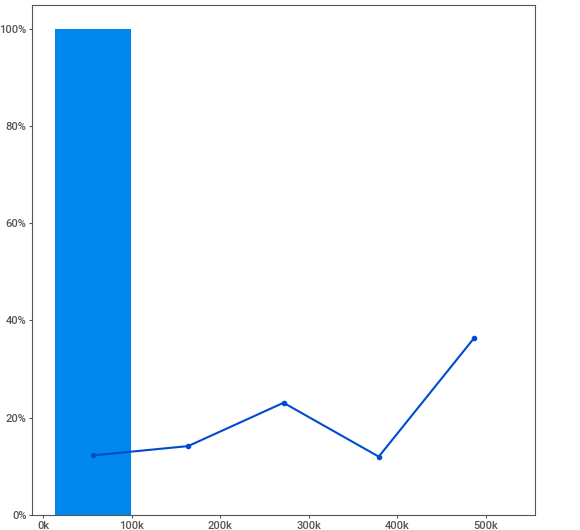
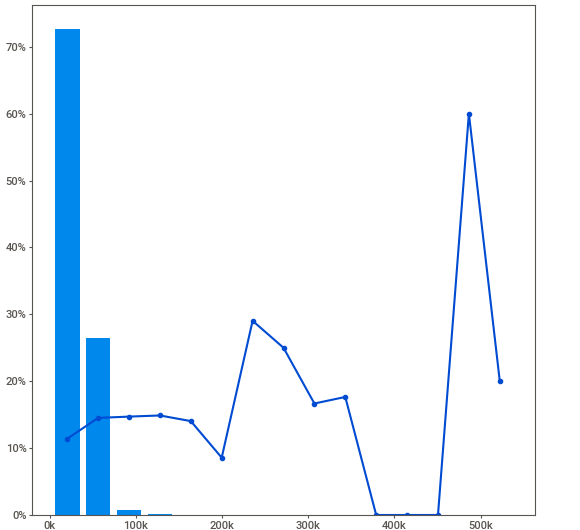
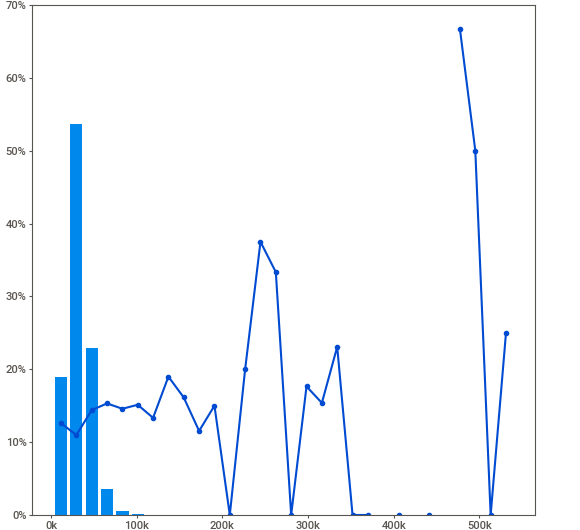
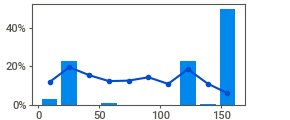
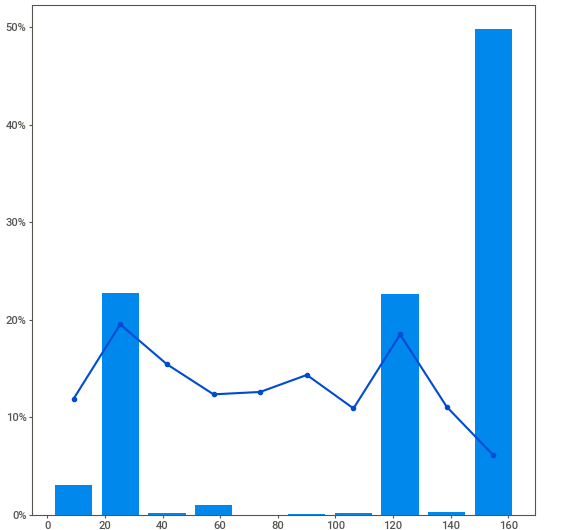
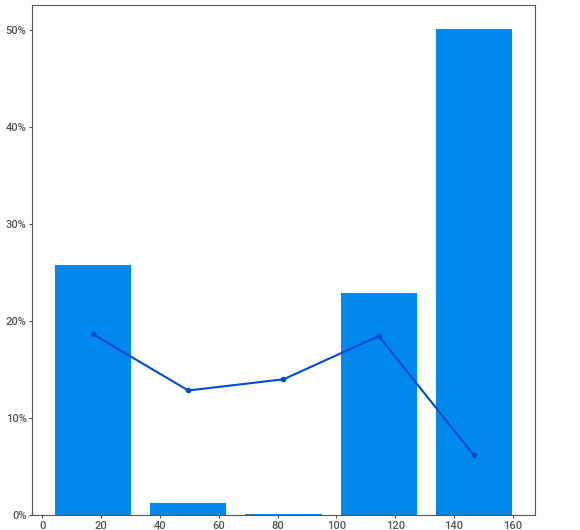
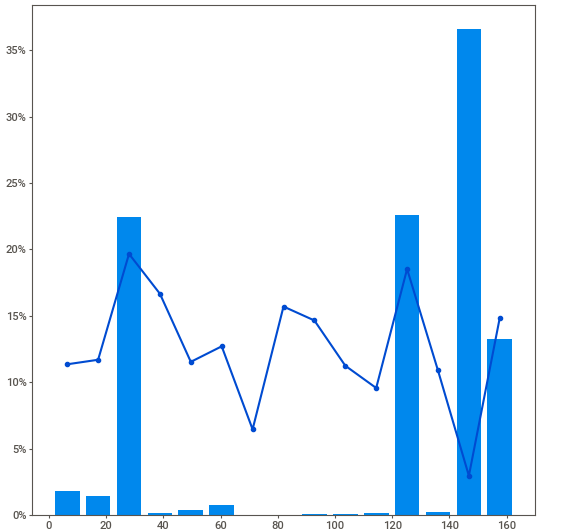
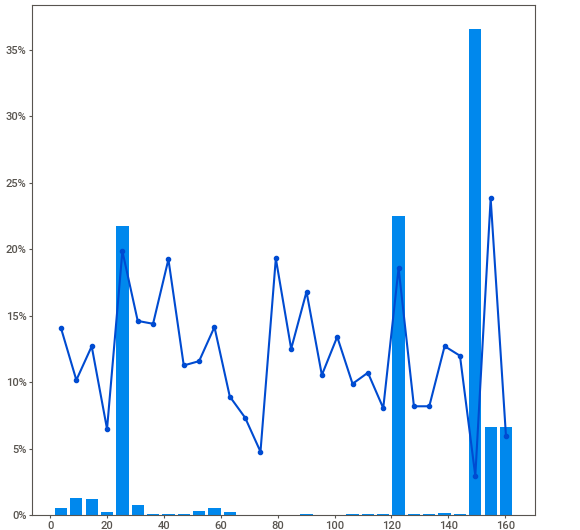
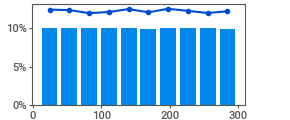
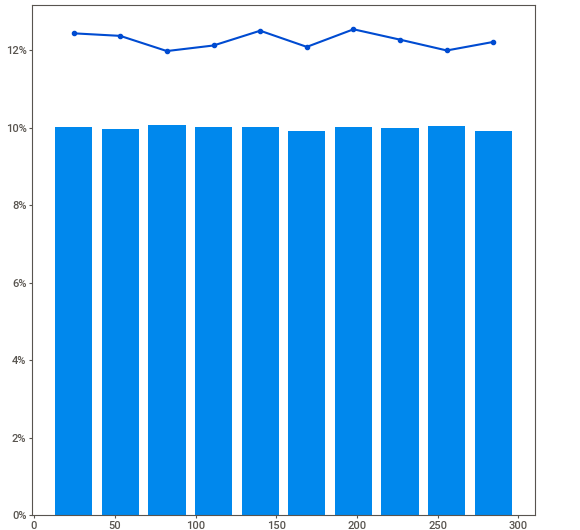
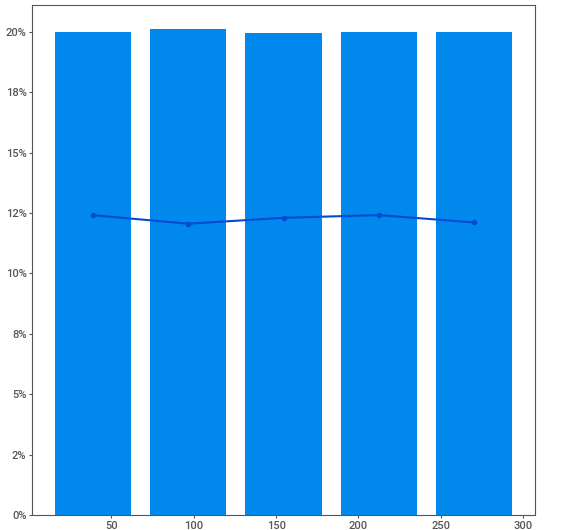
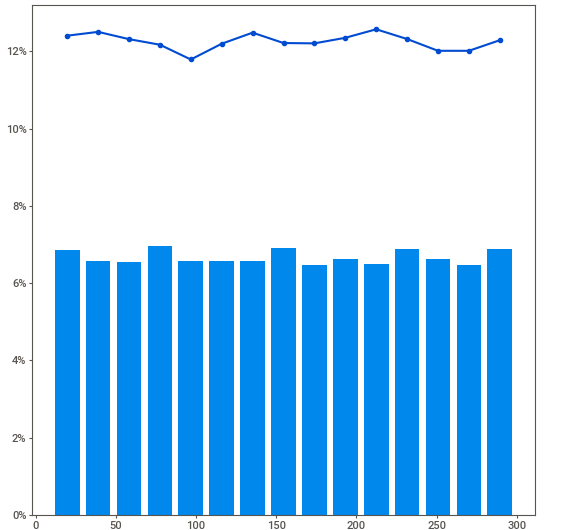
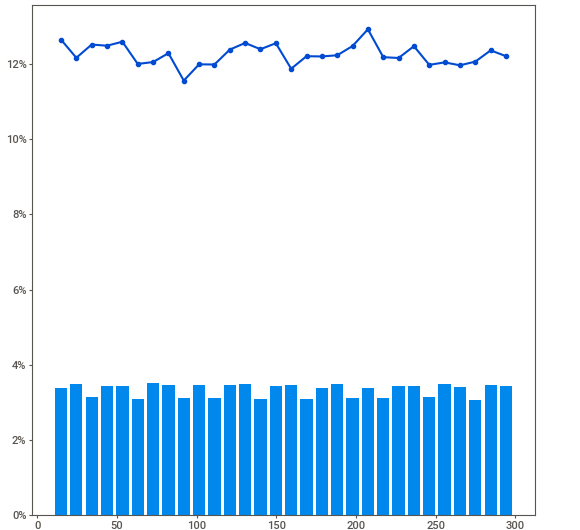
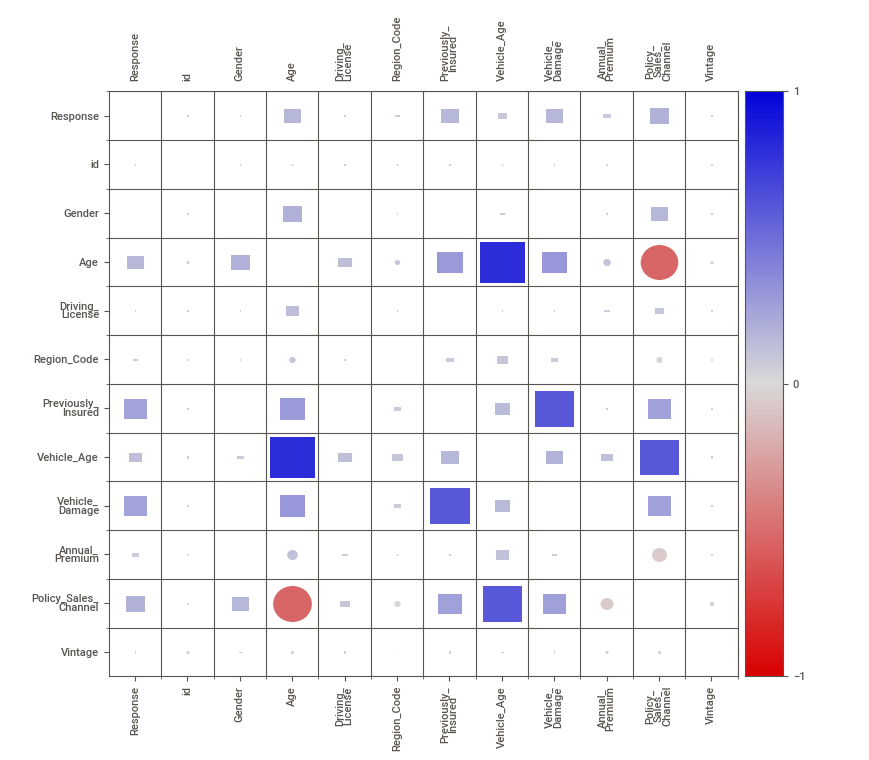
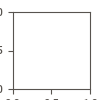

In [ ]:
# importing sweetviz
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(df, target_feat='Response')

#display the report
advert_report.show_notebook(layout="vertical", scale=0.8, w=880, h=700)

 Давайте порівняємо train and test set

In [ ]:
df_test = pd.read_csv("test.csv")

                                             |          | [  0%]   00:00 -> (? left)


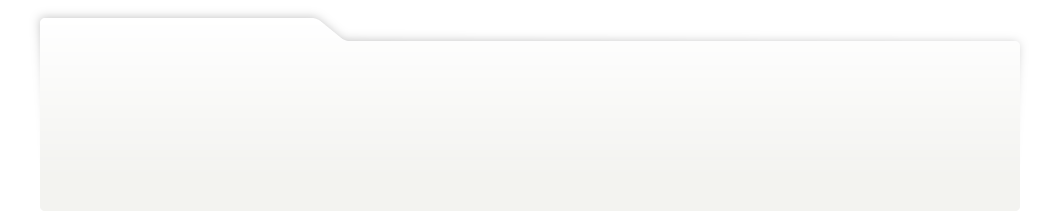
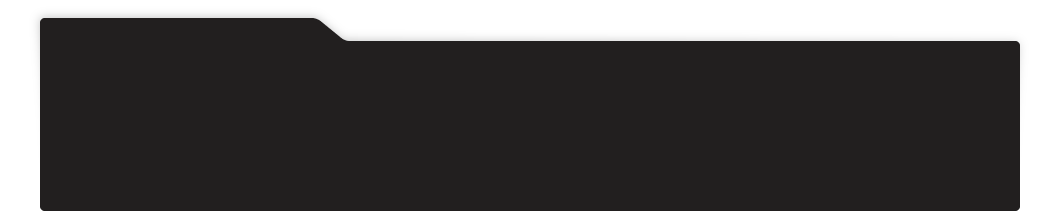
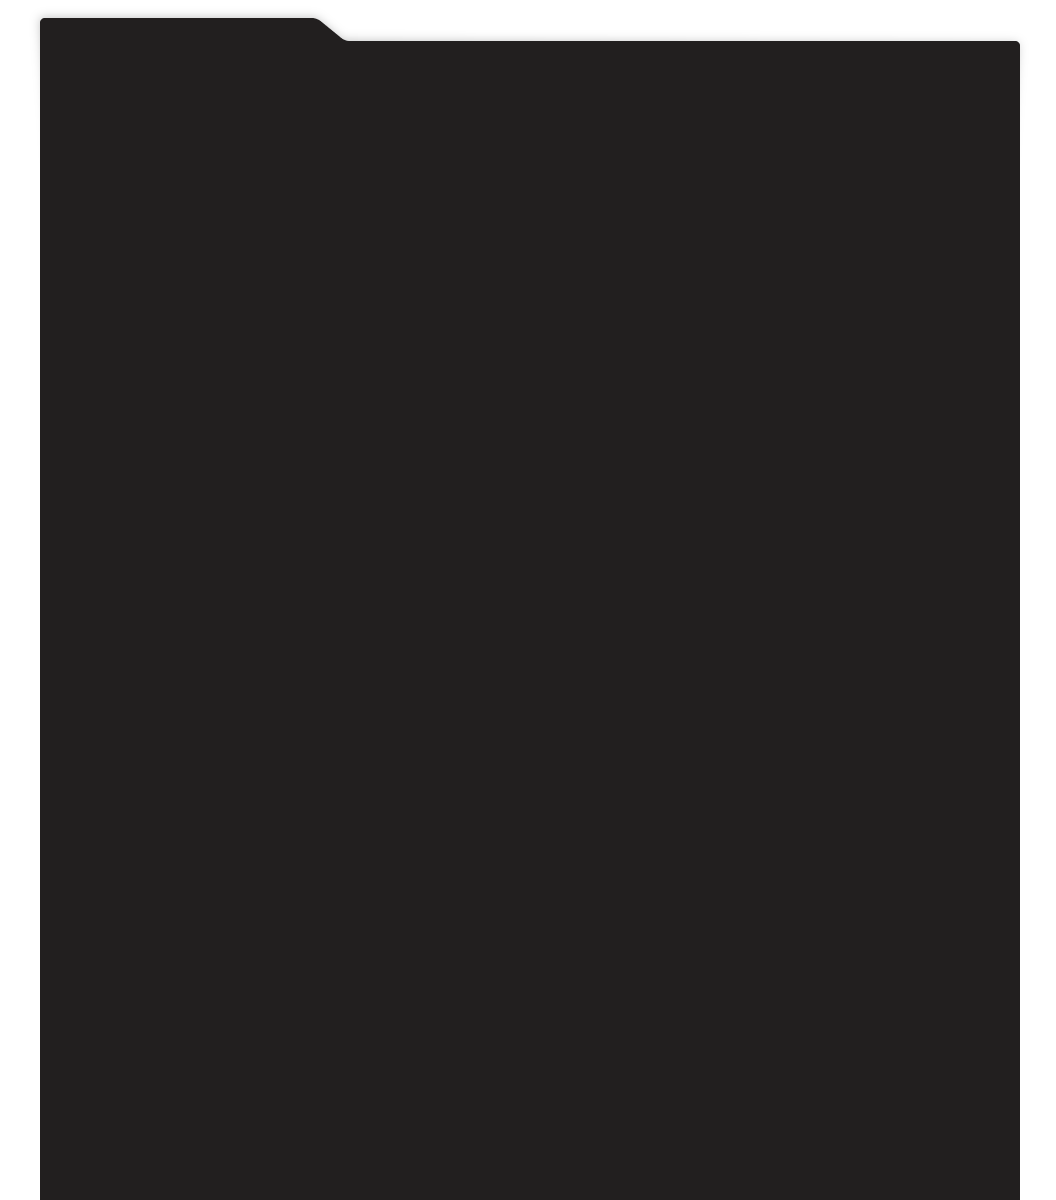
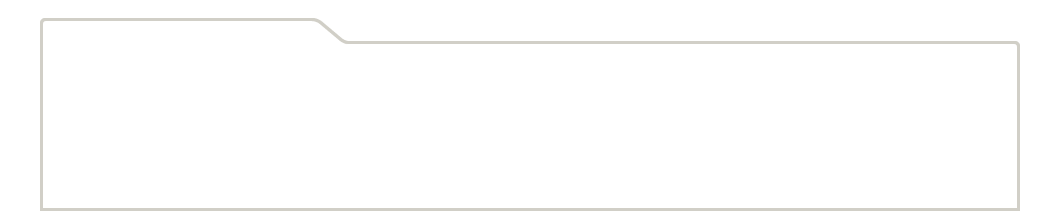
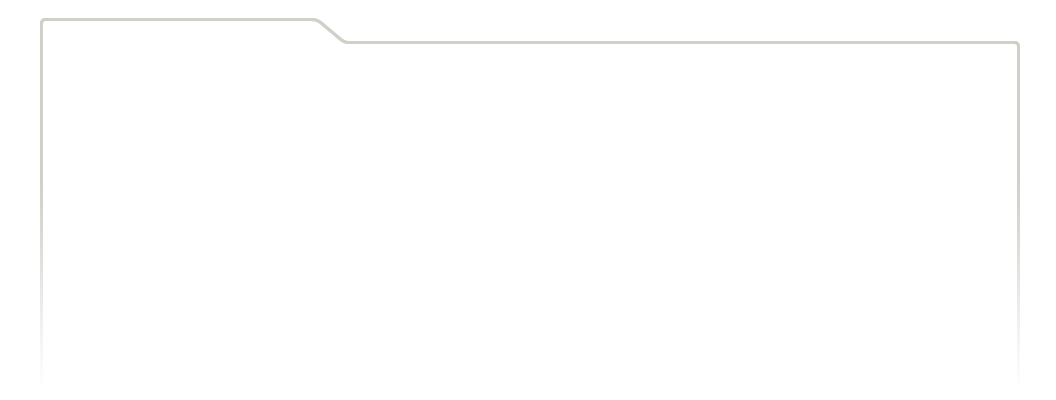
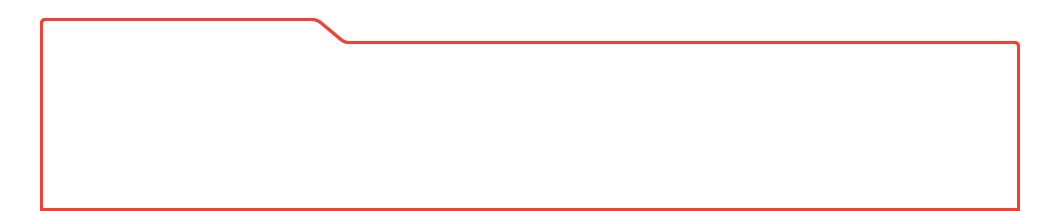
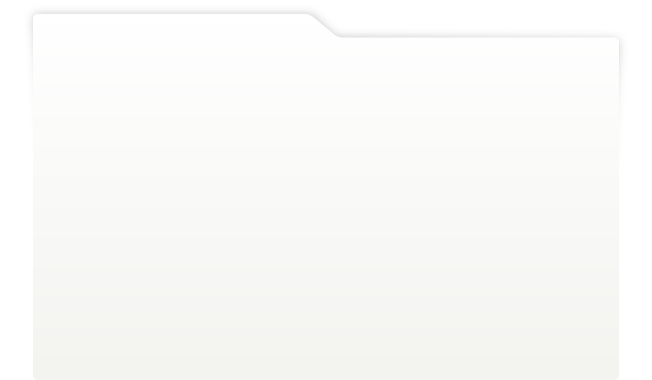
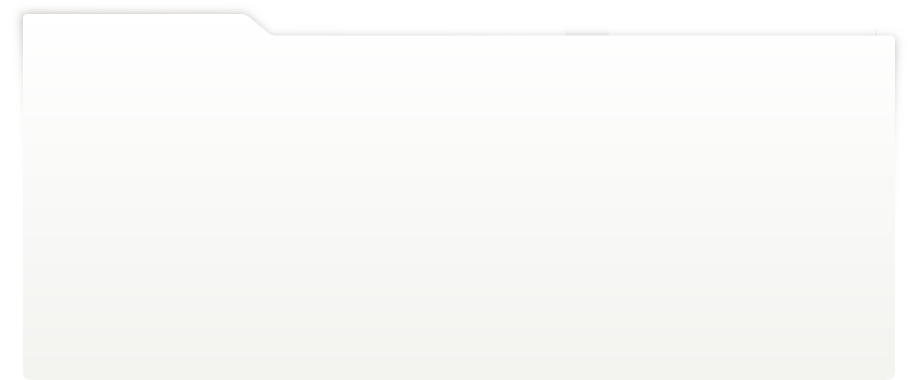
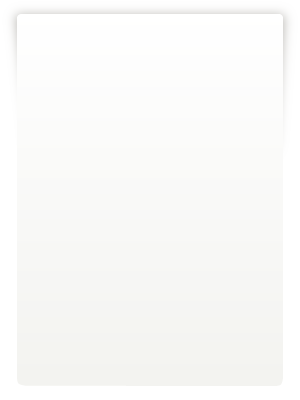
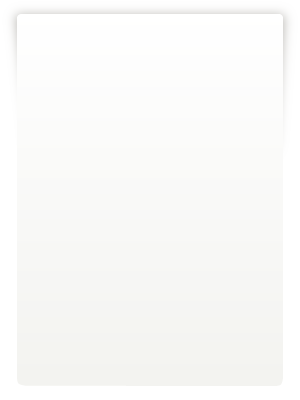
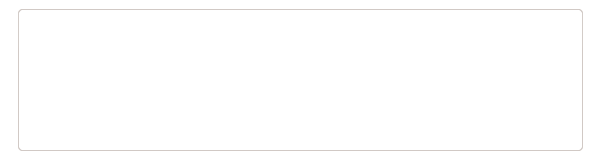
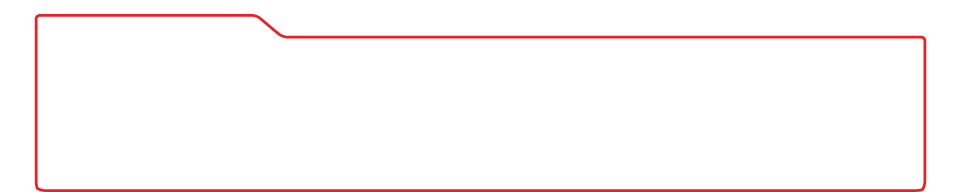
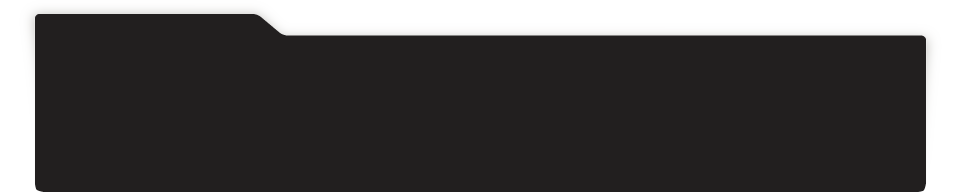
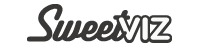
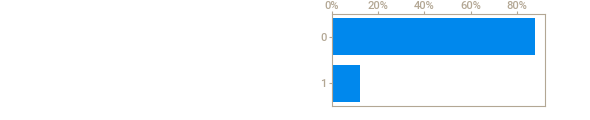
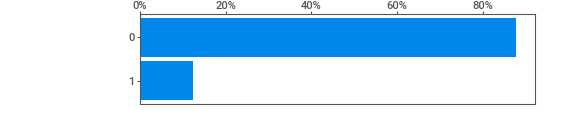
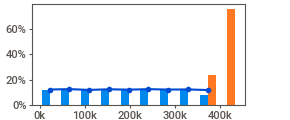
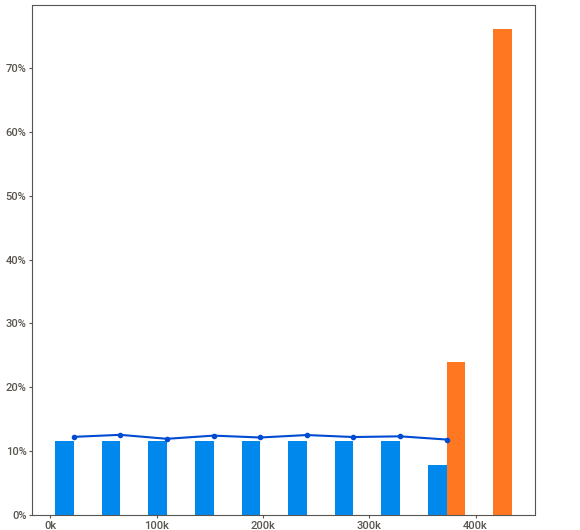
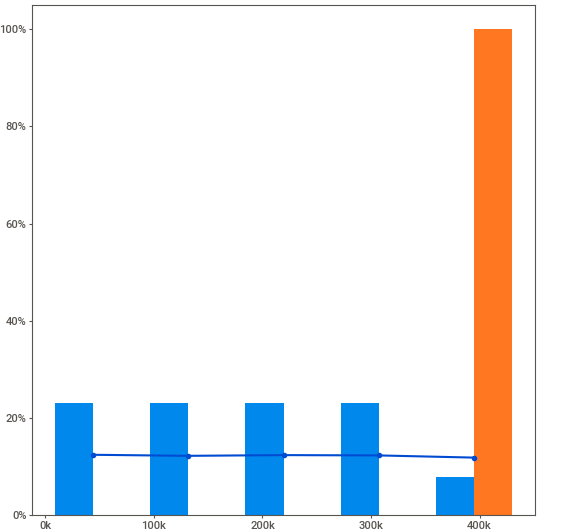
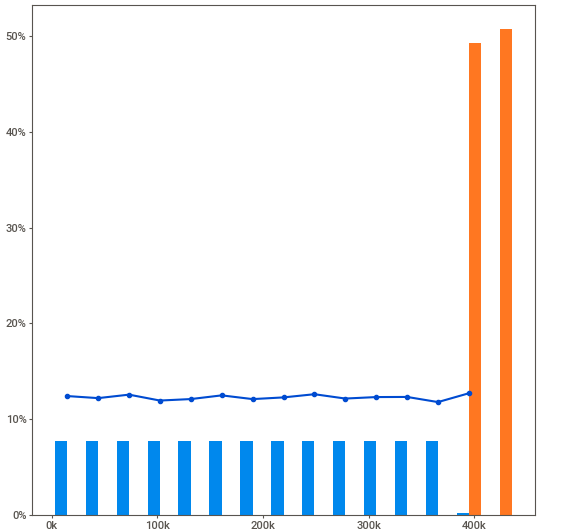
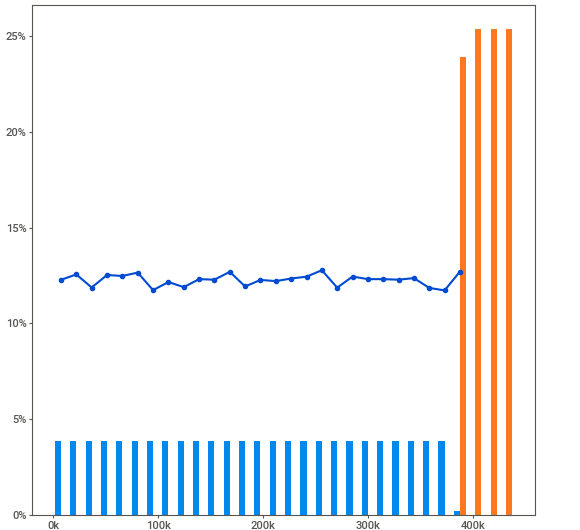
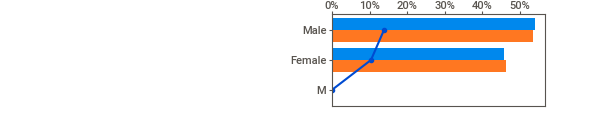
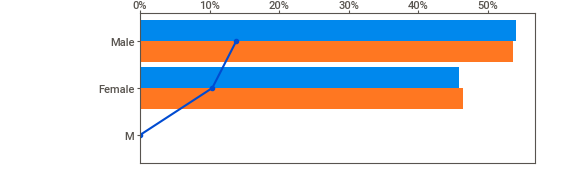
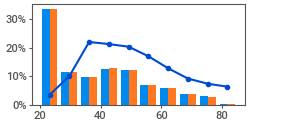
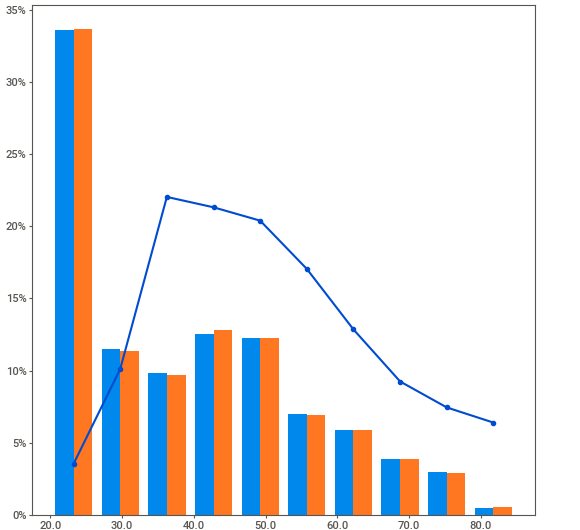
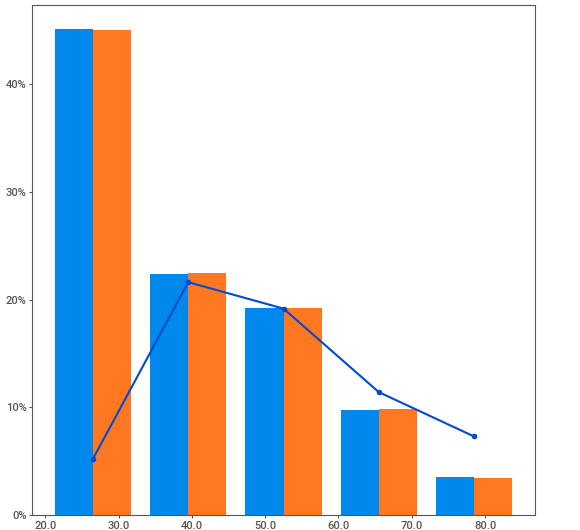
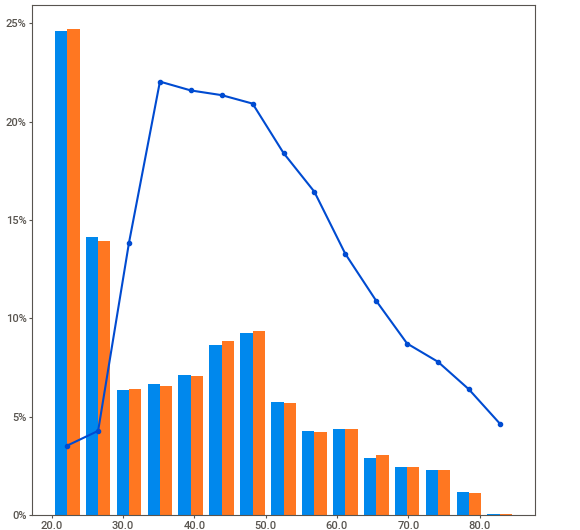
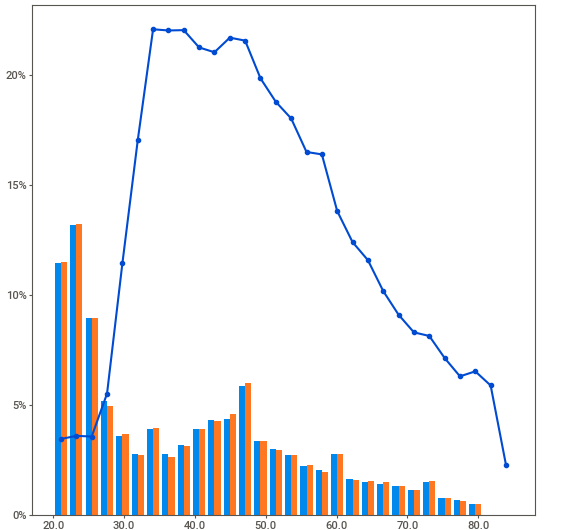
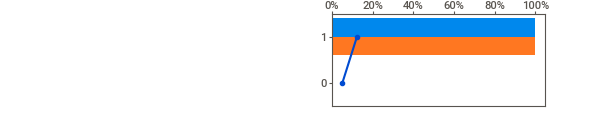
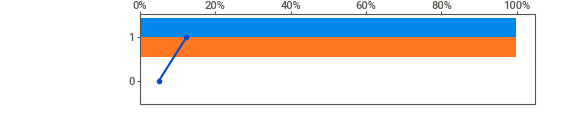
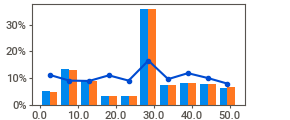
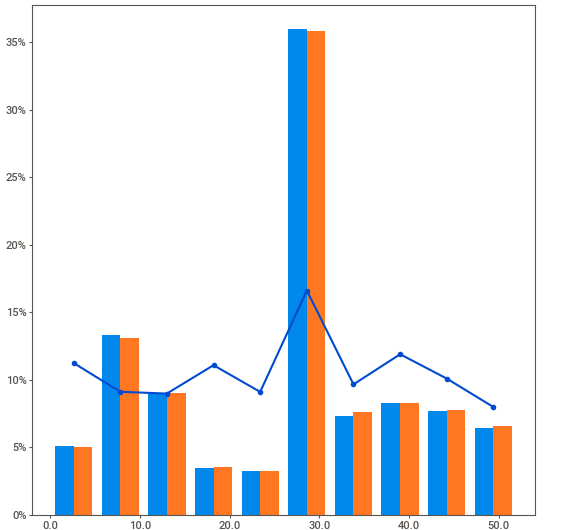
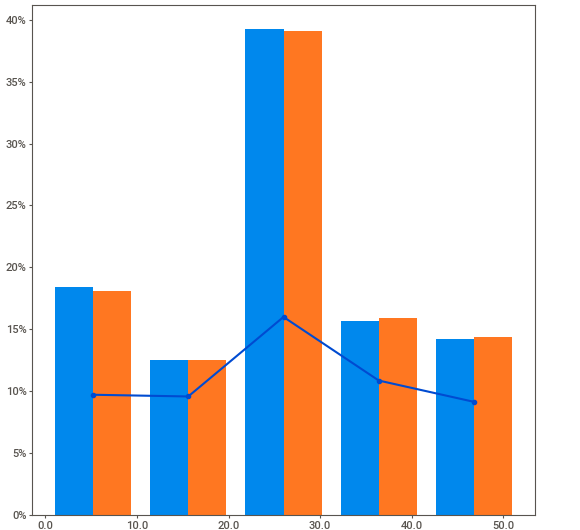
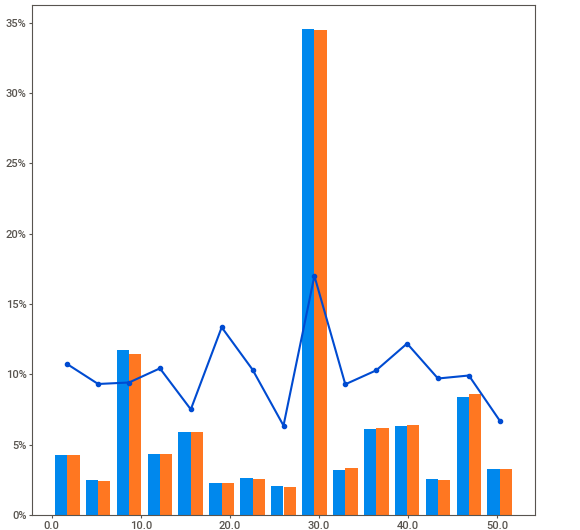
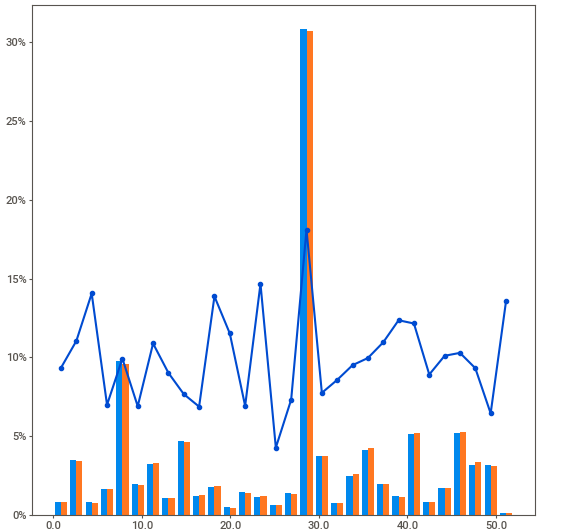
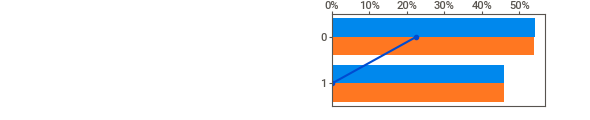
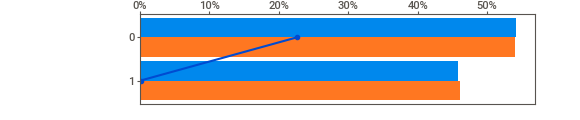
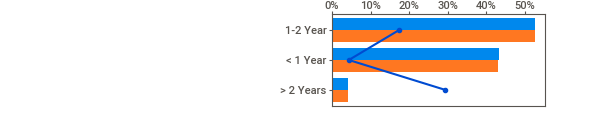
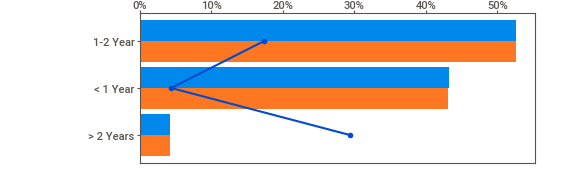
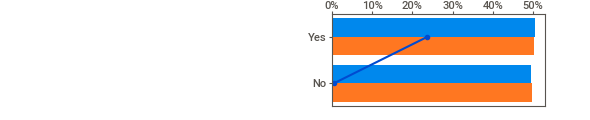
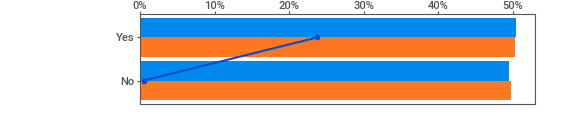
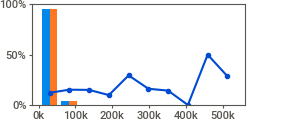
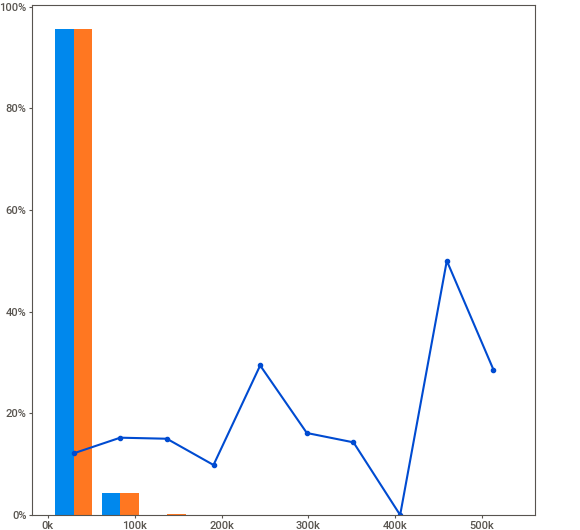
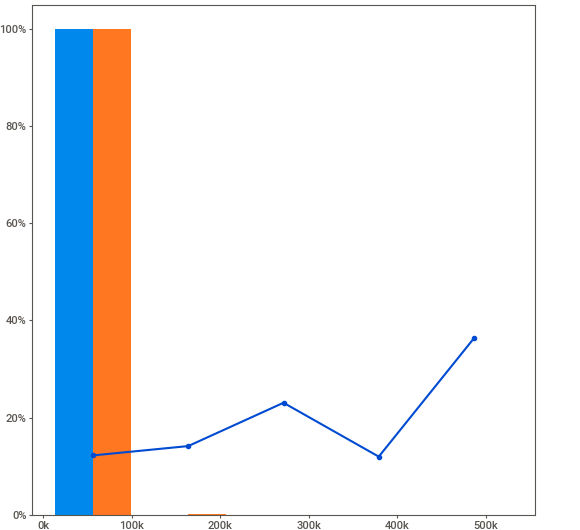
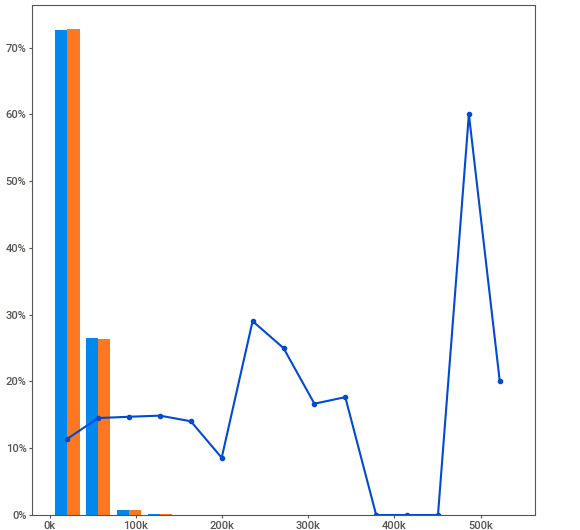
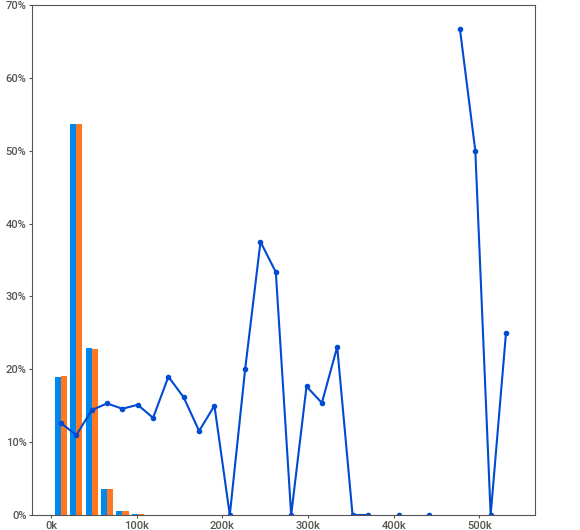
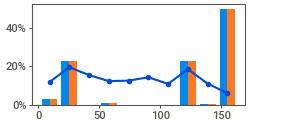
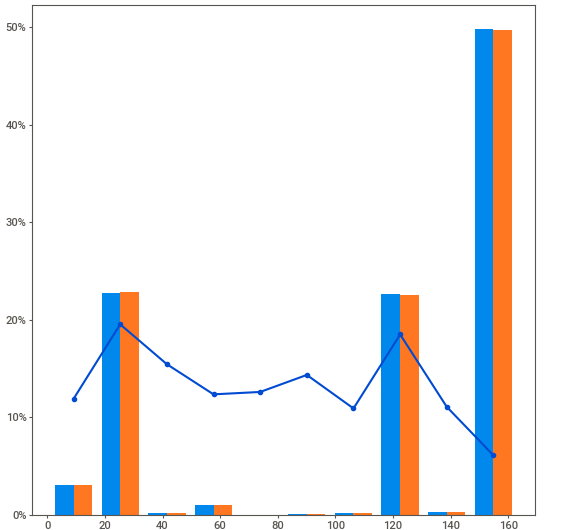
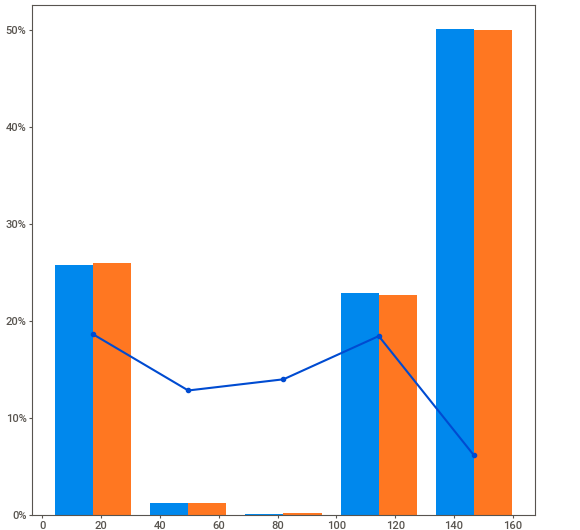
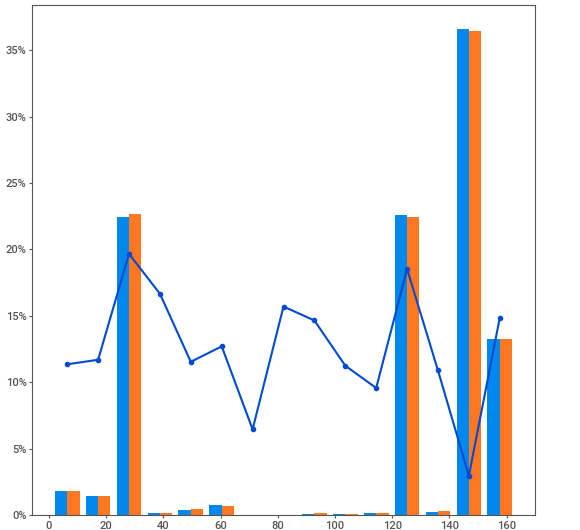
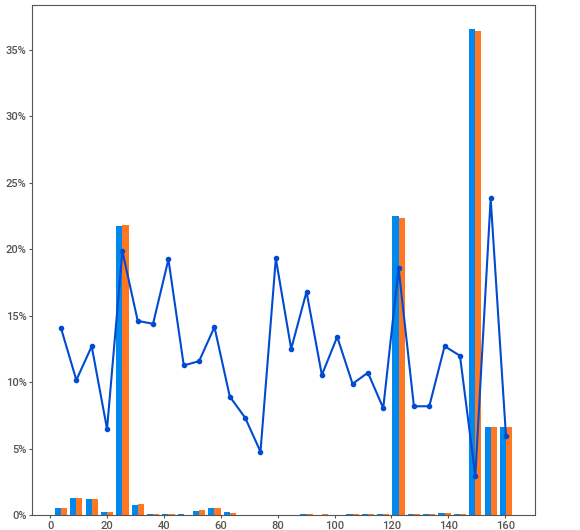
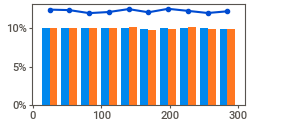
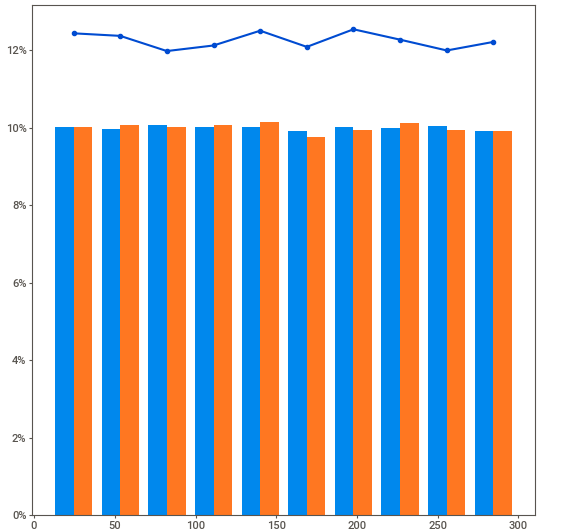
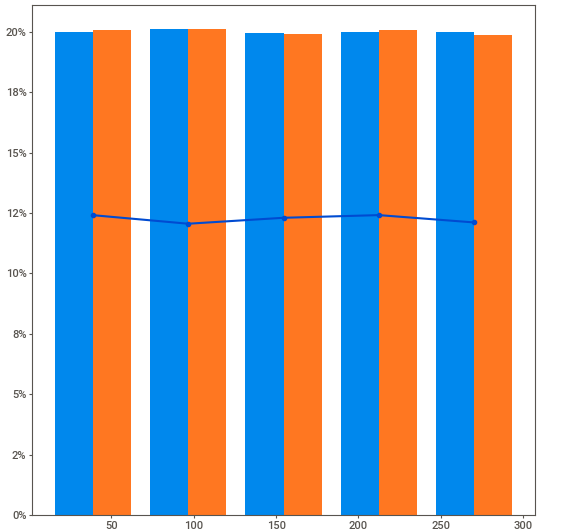
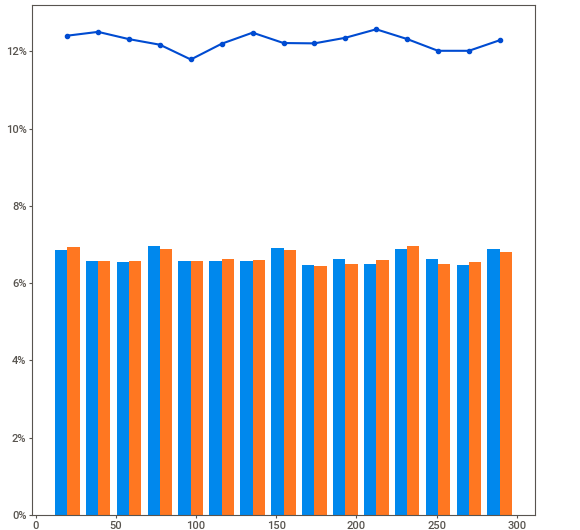
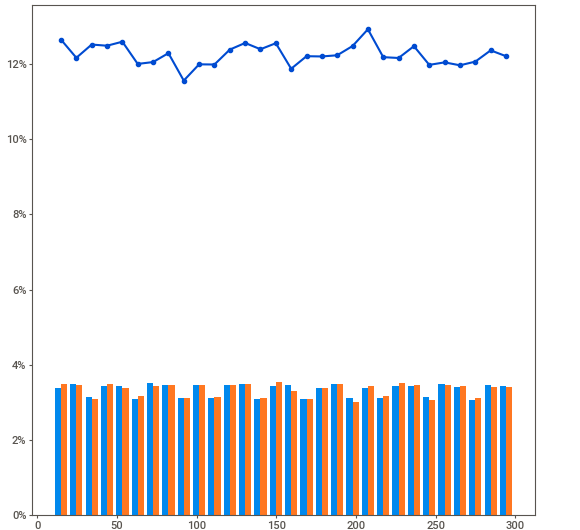
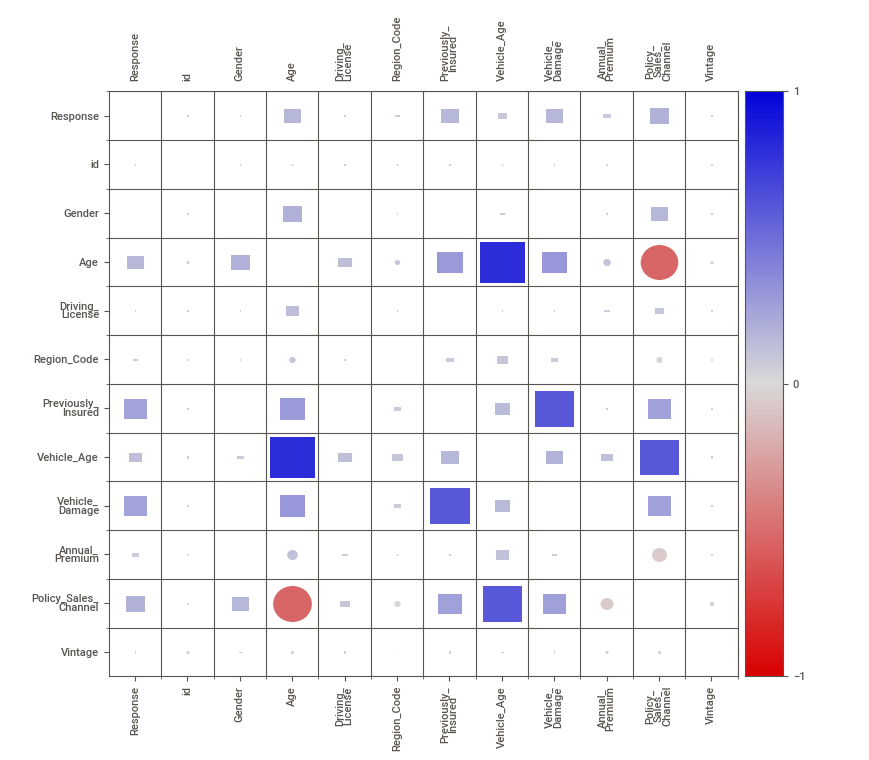
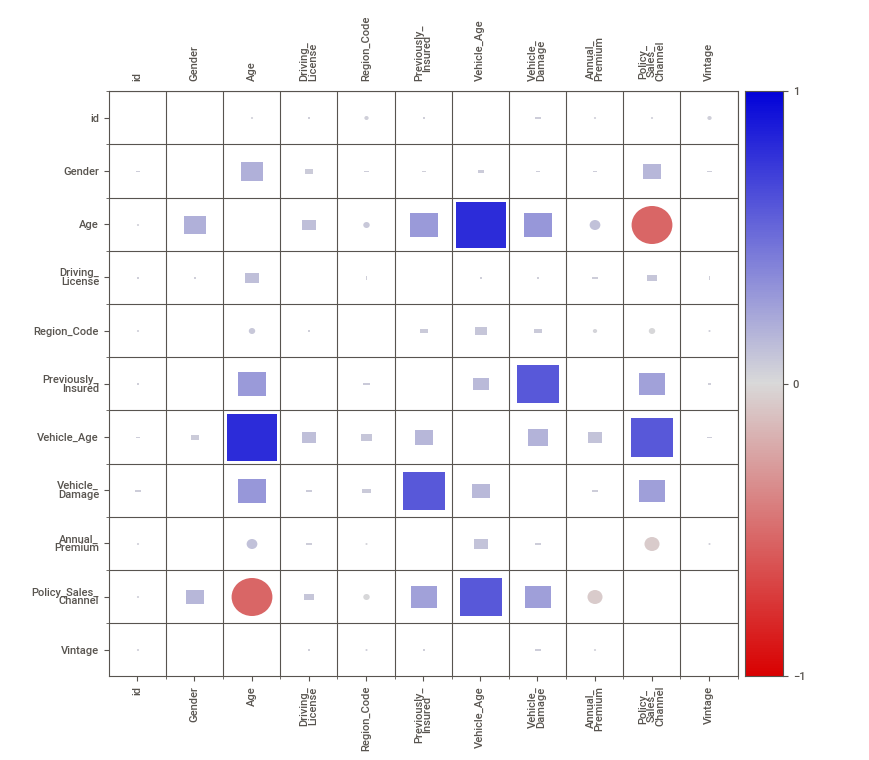

In [ ]:
compare_report = sv.compare([df, "Train"], [df_test, "Test"], target_feat='Response')

#display the report
compare_report.show_notebook(layout="vertical", scale=0.8, w=880, h=700)